In [7]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import pywt
import matplotlib.pyplot as plt
import keras
import pmdarima as pm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

sns.set( rc={'figure.figsize': (15, 8)})

In [77]:
stations_info = pd.read_excel('data/Estaciones.xlsx', sheet_name='INFO')
stations_maxima = pd.read_excel('data/Estaciones.xlsx', sheet_name='Maximos', header=1, parse_dates=['Año hid'])


In [41]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values

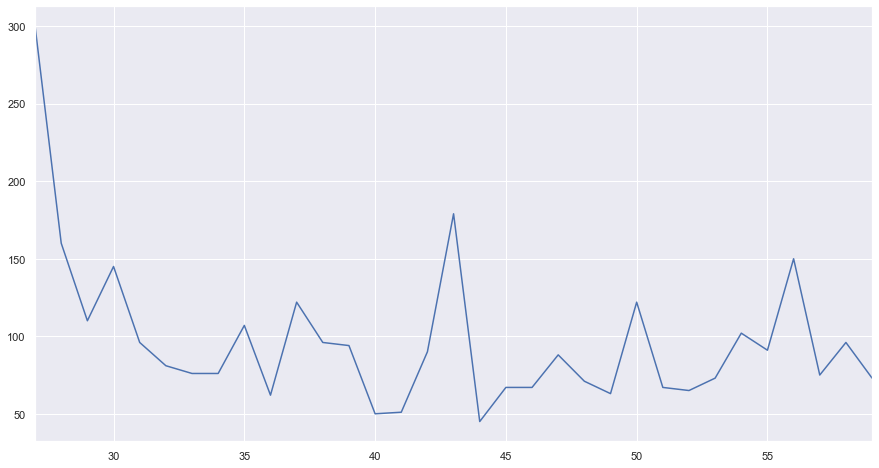

In [10]:
stations_maxima['San Luis Tucuman'].dropna().plot()

# LSTM NEURAL NETWORK

A long short-term memory is a type of artificial neural network with a recurrent architecture, having feedback connections to keep track of long-term dependencies in the input sequences.

with the function *split_sequence* we generate the values (x,y) to train the model, where each x,y are a sequence of *n_steps* values from the dataset and the next value to predict.

In [107]:
np.random.seed(7)
def split_sequence(sequence, n_steps):
    X, y = list(), list() 
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

We train **20** of these models **200 epocs** with the sequences, taking the **mean** of the predictions as the **final solution** 

In [193]:
solutions = {}
for i in range(5):
    dataset = stations_maxima['San Luis Tucuman'].dropna().values[1:]
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=2)
    x_ = np.array(dataset[-10:])
    y = []
    for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    solutions[i] = y


Epoch 1/200
 - 19s - loss: 7265.4219
Epoch 2/200
 - 0s - loss: 5034.8770
Epoch 3/200
 - 0s - loss: 3746.1853
Epoch 4/200
 - 0s - loss: 2859.0083
Epoch 5/200
 - 0s - loss: 2494.3904
Epoch 6/200
 - 0s - loss: 2555.2795
Epoch 7/200
 - 0s - loss: 2440.0845
Epoch 8/200
 - 0s - loss: 1882.9039
Epoch 9/200
 - 0s - loss: 1528.8468
Epoch 10/200
 - 0s - loss: 1135.1884
Epoch 11/200
 - 0s - loss: 1117.0027
Epoch 12/200
 - 0s - loss: 1157.2736
Epoch 13/200
 - 0s - loss: 999.3701
Epoch 14/200
 - 0s - loss: 861.2563
Epoch 15/200
 - 0s - loss: 726.3043
Epoch 16/200
 - 0s - loss: 644.6967
Epoch 17/200
 - 0s - loss: 548.3969
Epoch 18/200
 - 0s - loss: 515.5753
Epoch 19/200
 - 0s - loss: 434.4720
Epoch 20/200
 - 0s - loss: 341.2642
Epoch 21/200
 - 0s - loss: 323.3484
Epoch 22/200
 - 0s - loss: 269.5457
Epoch 23/200
 - 0s - loss: 230.2239
Epoch 24/200
 - 0s - loss: 216.1699
Epoch 25/200
 - 0s - loss: 168.5280
Epoch 26/200
 - 0s - loss: 201.4038
Epoch 27/200
 - 0s - loss: 117.6727
Epoch 28/200
 - 0s - los

Epoch 26/200
 - 0s - loss: 942.2488
Epoch 27/200
 - 0s - loss: 903.2649
Epoch 28/200
 - 0s - loss: 861.1391
Epoch 29/200
 - 0s - loss: 840.2403
Epoch 30/200
 - 0s - loss: 814.1727
Epoch 31/200
 - 0s - loss: 774.5066
Epoch 32/200
 - 0s - loss: 731.5896
Epoch 33/200
 - 0s - loss: 701.5334
Epoch 34/200
 - 0s - loss: 679.8384
Epoch 35/200
 - 0s - loss: 655.8444
Epoch 36/200
 - 0s - loss: 623.6403
Epoch 37/200
 - 0s - loss: 582.3616
Epoch 38/200
 - 0s - loss: 585.4340
Epoch 39/200
 - 0s - loss: 514.7928
Epoch 40/200
 - 0s - loss: 498.3944
Epoch 41/200
 - 0s - loss: 520.6650
Epoch 42/200
 - 0s - loss: 463.0728
Epoch 43/200
 - 0s - loss: 452.0070
Epoch 44/200
 - 0s - loss: 430.5519
Epoch 45/200
 - 0s - loss: 414.8136
Epoch 46/200
 - 0s - loss: 402.8637
Epoch 47/200
 - 0s - loss: 371.2600
Epoch 48/200
 - 0s - loss: 336.2246
Epoch 49/200
 - 0s - loss: 309.9679
Epoch 50/200
 - 0s - loss: 285.7048
Epoch 51/200
 - 0s - loss: 261.5847
Epoch 52/200
 - 0s - loss: 235.5379
Epoch 53/200
 - 0s - loss: 2

 - 0s - loss: 305.5156
Epoch 54/200
 - 0s - loss: 294.5819
Epoch 55/200
 - 0s - loss: 282.7530
Epoch 56/200
 - 0s - loss: 273.0396
Epoch 57/200
 - 0s - loss: 259.9454
Epoch 58/200
 - 0s - loss: 248.1418
Epoch 59/200
 - 0s - loss: 235.4633
Epoch 60/200
 - 0s - loss: 223.4305
Epoch 61/200
 - 0s - loss: 213.6900
Epoch 62/200
 - 0s - loss: 204.0649
Epoch 63/200
 - 0s - loss: 199.0447
Epoch 64/200
 - 0s - loss: 179.3864
Epoch 65/200
 - 0s - loss: 167.5911
Epoch 66/200
 - 0s - loss: 168.5294
Epoch 67/200
 - 0s - loss: 144.0262
Epoch 68/200
 - 0s - loss: 180.0376
Epoch 69/200
 - 0s - loss: 168.0743
Epoch 70/200
 - 0s - loss: 163.0153
Epoch 71/200
 - 0s - loss: 130.6894
Epoch 72/200
 - 0s - loss: 121.6045
Epoch 73/200
 - 0s - loss: 108.2775
Epoch 74/200
 - 0s - loss: 102.8783
Epoch 75/200
 - 0s - loss: 96.3046
Epoch 76/200
 - 0s - loss: 75.0944
Epoch 77/200
 - 0s - loss: 62.0198
Epoch 78/200
 - 0s - loss: 60.1442
Epoch 79/200
 - 0s - loss: 55.1466
Epoch 80/200
 - 0s - loss: 54.5745
Epoch 81/20

Epoch 85/200
 - 0s - loss: 0.1934
Epoch 86/200
 - 0s - loss: 0.3569
Epoch 87/200
 - 0s - loss: 0.4165
Epoch 88/200
 - 0s - loss: 0.3052
Epoch 89/200
 - 0s - loss: 0.2980
Epoch 90/200
 - 0s - loss: 0.3085
Epoch 91/200
 - 0s - loss: 0.2513
Epoch 92/200
 - 0s - loss: 0.1879
Epoch 93/200
 - 0s - loss: 0.1617
Epoch 94/200
 - 0s - loss: 0.1471
Epoch 95/200
 - 0s - loss: 0.1364
Epoch 96/200
 - 0s - loss: 0.1065
Epoch 97/200
 - 0s - loss: 0.0842
Epoch 98/200
 - 0s - loss: 0.0749
Epoch 99/200
 - 0s - loss: 0.0804
Epoch 100/200
 - 0s - loss: 0.0525
Epoch 101/200
 - 0s - loss: 0.0621
Epoch 102/200
 - 0s - loss: 0.0841
Epoch 103/200
 - 0s - loss: 0.0761
Epoch 104/200
 - 0s - loss: 0.0615
Epoch 105/200
 - 0s - loss: 0.0477
Epoch 106/200
 - 0s - loss: 0.0460
Epoch 107/200
 - 0s - loss: 0.0436
Epoch 108/200
 - 0s - loss: 0.0338
Epoch 109/200
 - 0s - loss: 0.0260
Epoch 110/200
 - 0s - loss: 0.0250
Epoch 111/200
 - 0s - loss: 0.0325
Epoch 112/200
 - 0s - loss: 0.0162
Epoch 113/200
 - 0s - loss: 0.0136


Epoch 111/200
 - 0s - loss: 0.8529
Epoch 112/200
 - 0s - loss: 0.6758
Epoch 113/200
 - 0s - loss: 0.5412
Epoch 114/200
 - 0s - loss: 0.3853
Epoch 115/200
 - 0s - loss: 0.3068
Epoch 116/200
 - 0s - loss: 0.3369
Epoch 117/200
 - 0s - loss: 0.3062
Epoch 118/200
 - 0s - loss: 0.2068
Epoch 119/200
 - 0s - loss: 0.1940
Epoch 120/200
 - 0s - loss: 0.2288
Epoch 121/200
 - 0s - loss: 0.1940
Epoch 122/200
 - 0s - loss: 0.1563
Epoch 123/200
 - 0s - loss: 0.1843
Epoch 124/200
 - 0s - loss: 0.1968
Epoch 125/200
 - 0s - loss: 0.1872
Epoch 126/200
 - 0s - loss: 0.2062
Epoch 127/200
 - 0s - loss: 0.2116
Epoch 128/200
 - 0s - loss: 0.1838
Epoch 129/200
 - 0s - loss: 0.1779
Epoch 130/200
 - 0s - loss: 0.1814
Epoch 131/200
 - 0s - loss: 0.1600
Epoch 132/200
 - 0s - loss: 0.1279
Epoch 133/200
 - 0s - loss: 0.1086
Epoch 134/200
 - 0s - loss: 0.0893
Epoch 135/200
 - 0s - loss: 0.0587
Epoch 136/200
 - 0s - loss: 0.0468
Epoch 137/200
 - 0s - loss: 0.0545
Epoch 138/200
 - 0s - loss: 0.0525
Epoch 139/200
 - 0s 

In [194]:
final_sol_1 = []
for i in range(10):
    mean = []
    for key in solutions.keys():
        
        mean.append(solutions[key][i][0][0])
    final_sol_1.append(np.mean(mean))

In [217]:
#pd.Series(final_sol_1).to_csv('solution_01.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [714]:
rain_forecats = np.append(stations_maxima['San Luis Tucuman'].dropna().values[:-1], final_sol_1)

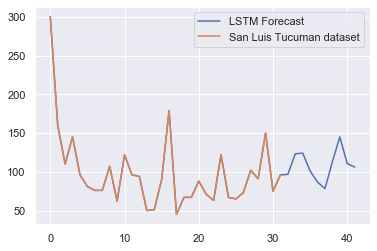

In [716]:
plt.plot(rain_forecats, label='LSTM Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend()

Then we use the same model but the last value of the time series is taken as test set, and we fit the model until minimum loss in the test set, weighting the final solution with the normalized inverse of this loss

In [ ]:
from keras import backend as K
def MAE(yTrue, yPred):
    return K.max(K.abs(yTrue - yPred))

In [717]:

solutions = {}
losses = []
for i in range(20):
    dataset = stations_maxima['San Luis Tucuman'].dropna().values[:-1]
    x_val = stations_maxima['San Luis Tucuman'].dropna().values[-11:-1]
    y_val = stations_maxima['San Luis Tucuman'].dropna().values[-1]
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    X_val = x_val.reshape((1, n_steps, n_features))
    es = EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=3,
                                  verbose=0, mode='auto')
    mc = ModelCheckpoint("best_model" + str(i) + ".h5", monitor='val_loss', mode='min', save_best_only=True)
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history_callback = model.fit(X, y, callbacks = [es, mc], epochs=200, verbose=2, validation_data = (X_val, [y_val]))
    loss_history = history_callback.history["val_loss"]

    modelo = Sequential()
    modelo.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    modelo.add(LSTM(50, activation='relu'))
    modelo.add(Dense(1))
    modelo.compile(optimizer='adam', loss='mse')
    modelo.load_weights("best_model" + str(i) + ".h5")
    sol = [] 
    x_ = estaciones_maximos['San Luis Tucuman'].dropna().values[-10:]

    losses.append(loss_history[-4])
    for j in range(10):   
            x_input = x_.reshape((1, n_steps, n_features))
            yhat = modelo.predict(x_input, verbose=0)
            x_ = np.append(x_[1:],yhat)
            sol.append(yhat)
    solutions[i] = sol

Train on 22 samples, validate on 1 samples
Epoch 1/200
 - 25s - loss: 8077.8047 - val_loss: 4078.6516
Epoch 2/200
 - 0s - loss: 6824.1689 - val_loss: 4580.8862
Epoch 3/200
 - 0s - loss: 6168.8545 - val_loss: 4516.8057
Epoch 4/200
 - 0s - loss: 5200.1631 - val_loss: 2486.7051
Epoch 5/200
 - 0s - loss: 4105.0000 - val_loss: 1901.3358
Epoch 6/200
 - 0s - loss: 2962.8652 - val_loss: 154.8407
Epoch 7/200
 - 0s - loss: 1765.9996 - val_loss: 150.3699
Epoch 8/200
 - 0s - loss: 1556.0636 - val_loss: 482.0898
Epoch 9/200
 - 0s - loss: 1699.5852 - val_loss: 1033.2856
Epoch 10/200
 - 0s - loss: 1926.5500 - val_loss: 1142.7269
Train on 22 samples, validate on 1 samples
Epoch 1/200
 - 23s - loss: 9171.5684 - val_loss: 6155.7798
Epoch 2/200
 - 0s - loss: 8238.6494 - val_loss: 5256.6538
Epoch 3/200
 - 0s - loss: 7709.3813 - val_loss: 3629.2852
Epoch 4/200
 - 0s - loss: 7164.1567 - val_loss: 2966.8689
Epoch 5/200
 - 0s - loss: 6604.3594 - val_loss: 2699.0559
Epoch 6/200
 - 0s - loss: 6110.2954 - val_lo

Epoch 10/200
 - 0s - loss: 3909.8760 - val_loss: 1525.6744
Epoch 11/200
 - 0s - loss: 3040.2744 - val_loss: 917.1736
Epoch 12/200
 - 0s - loss: 2106.2009 - val_loss: 267.5218
Epoch 13/200
 - 0s - loss: 1417.2590 - val_loss: 9.1112
Epoch 14/200
 - 0s - loss: 1629.5082 - val_loss: 413.8703
Epoch 15/200
 - 0s - loss: 2535.4839 - val_loss: 329.8622
Epoch 16/200
 - 0s - loss: 2210.9368 - val_loss: 106.3928
Train on 22 samples, validate on 1 samples
Epoch 1/200
 - 26s - loss: 12585.4189 - val_loss: 8534.0371
Epoch 2/200
 - 0s - loss: 12009.0254 - val_loss: 8011.8042
Epoch 3/200
 - 0s - loss: 11503.9385 - val_loss: 7584.6343
Epoch 4/200
 - 0s - loss: 11034.4473 - val_loss: 7194.8687
Epoch 5/200
 - 0s - loss: 10582.5752 - val_loss: 6819.5371
Epoch 6/200
 - 0s - loss: 10140.2344 - val_loss: 6437.6187
Epoch 7/200
 - 0s - loss: 9702.6934 - val_loss: 6073.7197
Epoch 8/200
 - 0s - loss: 9282.1445 - val_loss: 5721.9775
Epoch 9/200
 - 0s - loss: 8902.5771 - val_loss: 5405.6792
Epoch 10/200
 - 0s - lo

Epoch 10/200
 - 0s - loss: 3672.5935 - val_loss: 926.6852
Epoch 11/200
 - 0s - loss: 3105.1819 - val_loss: 576.2029
Epoch 12/200
 - 0s - loss: 2424.2090 - val_loss: 186.0628
Epoch 13/200
 - 0s - loss: 1669.0137 - val_loss: 2.4657
Epoch 14/200
 - 0s - loss: 1209.7198 - val_loss: 98.9751
Epoch 15/200
 - 0s - loss: 1265.5018 - val_loss: 226.9145
Epoch 16/200
 - 0s - loss: 1366.6559 - val_loss: 258.4401
Train on 22 samples, validate on 1 samples
Epoch 1/200
 - 30s - loss: 6014.6187 - val_loss: 1563.2301
Epoch 2/200
 - 0s - loss: 3689.0210 - val_loss: 726.2248
Epoch 3/200
 - 0s - loss: 2677.5391 - val_loss: 337.7431
Epoch 4/200
 - 0s - loss: 2085.9751 - val_loss: 102.5151
Epoch 5/200
 - 0s - loss: 1747.6971 - val_loss: 1.8758
Epoch 6/200
 - 0s - loss: 1665.8730 - val_loss: 48.3354
Epoch 7/200
 - 0s - loss: 1821.4327 - val_loss: 152.3636
Epoch 8/200
 - 0s - loss: 1930.0465 - val_loss: 216.1200
Train on 22 samples, validate on 1 samples
Epoch 1/200
 - 29s - loss: 8043.4453 - val_loss: 5668.44

In [154]:
sol = [] 
x_ = stations_maxima['San Luis Tucuman'].dropna().values[-10:]
for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = modelo.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        sol.append(yhat)
       

NameError: name 'modelo' is not defined

In [516]:
inv_losses = [1/i for i in losses]

In [517]:
factor = [i/sum(inv_losses) for i in inv_losses]

In [518]:
final_sol_2 = []
for i in range(10):
    sol_suma = 0
    for key in solutions.keys():
        
        sol_suma+= solutions[key][i][0][0]*factor[key]
        #print(factor[key])
    final_sol_2.append(sol_suma)

In [326]:
#pd.Series(final_sol).to_csv('solution_02.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Bidirectional LSTM

Then we tried a **bidirectional LSTM**. The main idea of this kind of recurrent neural network is to extract and learn patterns from the input sequence forward and backwards, using this information to predict future values.

In [341]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values[:-3]

n_features = 1
n_steps = 10
X, y = split_sequence(dataset, n_steps)
X_val, y_val = split_sequence(estaciones_maximos['San Luis Tucuman'].dropna().values[-13:], n_steps)
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
es = EarlyStopping(monitor='val_loss',
                                  min_delta=0,
                                  patience=10,
                                  verbose=0, mode='auto')
mc = ModelCheckpoint("best_model_3test.h5", monitor='val_loss', mode='min', save_best_only=True)
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history_callback = model.fit(X, y, epochs=200, verbose=2, validation_data = (X_val, y_val))
loss_history = history_callback.history["val_loss"]

modelo = Sequential()
modelo.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
modelo.add(LSTM(50, activation='relu'))
modelo.add(Dense(1))
modelo.compile(optimizer='adam', loss='mse')
modelo.load_weights("best_model" + str(i) + ".h5")

Train on 20 samples, validate on 3 samples
Epoch 1/200
 - 10s - loss: 5770.2993 - val_loss: 3892.8835
Epoch 2/200
 - 0s - loss: 5227.3008 - val_loss: 3497.9688
Epoch 3/200
 - 0s - loss: 4723.6221 - val_loss: 3095.8154
Epoch 4/200
 - 0s - loss: 4229.7388 - val_loss: 2690.4551
Epoch 5/200
 - 0s - loss: 3777.2878 - val_loss: 2279.7498
Epoch 6/200
 - 0s - loss: 3361.9075 - val_loss: 1865.8683
Epoch 7/200
 - 0s - loss: 2996.9402 - val_loss: 1486.4844
Epoch 8/200
 - 0s - loss: 2701.4626 - val_loss: 1179.3734
Epoch 9/200
 - 0s - loss: 2437.9319 - val_loss: 907.9045
Epoch 10/200
 - 0s - loss: 2241.2876 - val_loss: 657.3893
Epoch 11/200
 - 0s - loss: 2039.1719 - val_loss: 433.5654
Epoch 12/200
 - 0s - loss: 1831.9156 - val_loss: 248.7323
Epoch 13/200
 - 0s - loss: 1631.9749 - val_loss: 117.5136
Epoch 14/200
 - 0s - loss: 1458.7791 - val_loss: 45.0322
Epoch 15/200
 - 0s - loss: 1326.0039 - val_loss: 30.3308
Epoch 16/200
 - 0s - loss: 1242.5369 - val_loss: 80.0447
Epoch 17/200
 - 0s - loss: 1208.

Epoch 146/200
 - 0s - loss: 0.0065 - val_loss: 802.9626
Epoch 147/200
 - 0s - loss: 0.0054 - val_loss: 801.6558
Epoch 148/200
 - 0s - loss: 0.0054 - val_loss: 798.4624
Epoch 149/200
 - 0s - loss: 0.0054 - val_loss: 795.5446
Epoch 150/200
 - 0s - loss: 0.0055 - val_loss: 792.8562
Epoch 151/200
 - 0s - loss: 0.0051 - val_loss: 791.2043
Epoch 152/200
 - 0s - loss: 0.0048 - val_loss: 792.0150
Epoch 153/200
 - 0s - loss: 0.0041 - val_loss: 793.2973
Epoch 154/200
 - 0s - loss: 0.0029 - val_loss: 793.6848
Epoch 155/200
 - 0s - loss: 0.0030 - val_loss: 793.9225
Epoch 156/200
 - 0s - loss: 0.0022 - val_loss: 793.1458
Epoch 157/200
 - 0s - loss: 0.0019 - val_loss: 791.6714
Epoch 158/200
 - 0s - loss: 0.0019 - val_loss: 791.0842
Epoch 159/200
 - 0s - loss: 0.0012 - val_loss: 790.4226
Epoch 160/200
 - 0s - loss: 0.0012 - val_loss: 789.1346
Epoch 161/200
 - 0s - loss: 7.6914e-04 - val_loss: 787.6358
Epoch 162/200
 - 0s - loss: 7.9921e-04 - val_loss: 784.8851
Epoch 163/200
 - 0s - loss: 9.8403e-04 -

## Wavelets Model


In this model, we decompose the series in its seasonal component and the long term trend. To decompose it, we use the Discrete wavelet transform (DWT) in the Wavelet Transforms python module (*pywt*)

In [79]:
dataset = stations_maxima['San Luis Tucuman'].dropna().values[:-1]

In [85]:
(cA, cD) = pywt.dwt(dataset,'db2')

In [96]:
rain_long_trend = pywt.idwt(None,cD, 'db2', 'smooth')
rain_seasonal = pywt.idwt(cA, None, 'db2', 'smooth')

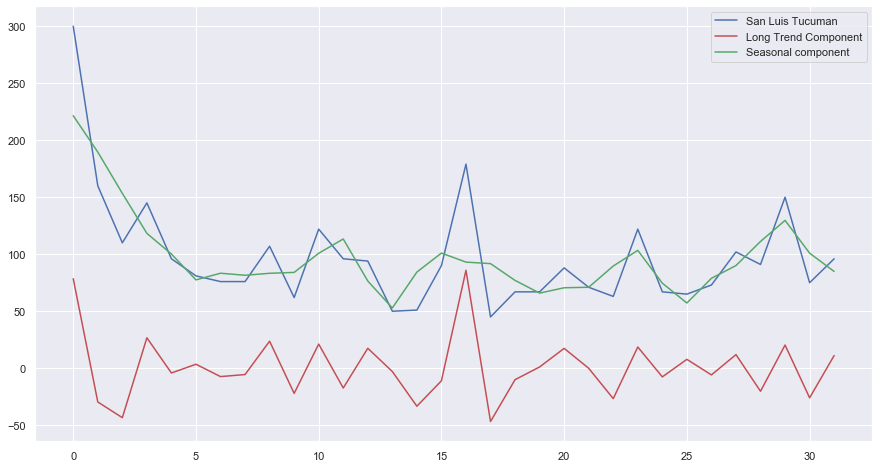

In [97]:
plt.plot(dataset,'-b', label='San Luis Tucuman' )
plt.plot(rain_long_trend, '-r', label='Long Trend Component')
plt.plot(rain_seasonal,'-g', label='Seasonal component')
plt.legend()


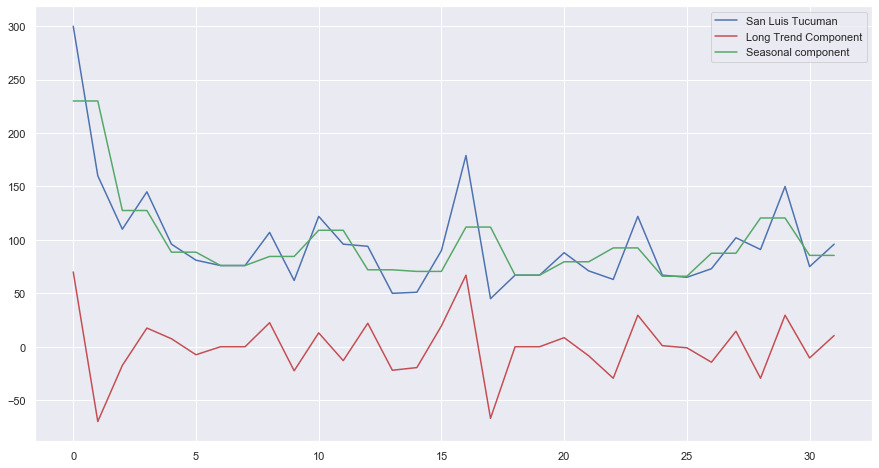

it's worth noticing that we obtaing the original sequence adding both the seasonal and long term trend series at each point in time.

Then we fit with an **ARIMA model** each time series, and then predict the values for the next 10 years. We obtain the final forecast adding this two predicted series, as mentioned before.


In [106]:
high = []
for i in range(10:)
    stepwise_model = pm.auto_arima(rain_long_trend, start_p=0, start_q=0,
                               max_p=0, max_q=1, m=7,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    future_forecast_high = stepwise_model.predict(n_periods=1)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=273.458, BIC=276.993, Fit time=0.068 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=275.660, BIC=278.016, Fit time=0.013 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=276.713, BIC=280.247, Fit time=0.046 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=257.558, BIC=262.270, Fit time=0.095 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=273.751, BIC=274.929, Fit time=0.015 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=274.898, BIC=279.611, Fit time=0.115 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7)

In [99]:
future_forecast_high = stepwise_model.predict(n_periods=1)

In [100]:
future_forecast_high

array([-1.30778983,  5.49652961, 11.3799869 , -0.89648502,  3.7761193 ,
        8.22337632,  6.62938365,  4.79137573, 11.97386728, 18.2354967 ])

In [101]:
stepwise_model = pm.auto_arima(rain_seasonal, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=275.312, BIC=278.114, Fit time=0.015 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=276.772, BIC=280.976, Fit time=0.049 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=270.946, BIC=275.150, Fit time=0.044 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=273.329, BIC=274.730, Fit time=0.018 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=269.855, BIC=275.460, Fit time=0.087 seconds
Near non-invertible roots for order (1, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.215 seconds


In [102]:
future_forecast_low = stepwise_model.predict(n_periods=10)

In [103]:
future_forecast = future_forecast_low + future_forecast_high

In [104]:
rain_forecats = np.append(stations_maxima['San Luis Tucuman'].dropna().values[:-1], future_forecast)

We plot the dataset and the forecast obtained from the model 

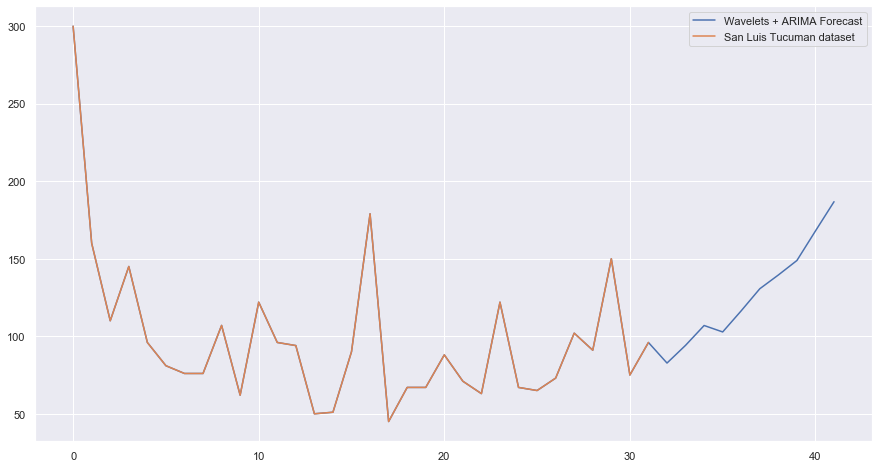

In [105]:
plt.plot(rain_forecats, label='Wavelets + ARIMA Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend()

In [445]:
#pd.Series(future_forecast).to_csv('solution_4.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In the next model, instead of using an ARIMA model to fit the 2 time series obtained from the wavelet decomposition, fit a **LSTM neural network** for each one, and finally we add the 2 predicted time series.

In [691]:
solutions_low = {}
for i in range(20):
    dataset =rain_low 
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=2)
    x_ = np.array(dataset[-10:])
    y = []
    for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    solutions_low[i] = y


Epoch 1/200
 - 12s - loss: 697.7337
Epoch 2/200
 - 0s - loss: 695.9563
Epoch 3/200
 - 0s - loss: 694.1268
Epoch 4/200
 - 0s - loss: 692.1686
Epoch 5/200
 - 0s - loss: 689.9189
Epoch 6/200
 - 0s - loss: 687.2707
Epoch 7/200
 - 0s - loss: 684.0847
Epoch 8/200
 - 0s - loss: 680.1351
Epoch 9/200
 - 0s - loss: 674.9409
Epoch 10/200
 - 0s - loss: 668.2099
Epoch 11/200
 - 0s - loss: 659.4866
Epoch 12/200
 - 0s - loss: 648.4999
Epoch 13/200
 - 0s - loss: 634.3531
Epoch 14/200
 - 0s - loss: 615.1558
Epoch 15/200
 - 0s - loss: 589.5972
Epoch 16/200
 - 0s - loss: 559.5961
Epoch 17/200
 - 0s - loss: 533.3666
Epoch 18/200
 - 0s - loss: 504.3797
Epoch 19/200
 - 0s - loss: 472.3333
Epoch 20/200
 - 0s - loss: 446.2976
Epoch 21/200
 - 0s - loss: 425.0368
Epoch 22/200
 - 0s - loss: 467.8322
Epoch 23/200
 - 0s - loss: 418.2110
Epoch 24/200
 - 0s - loss: 491.5013
Epoch 25/200
 - 0s - loss: 420.6233
Epoch 26/200
 - 0s - loss: 404.1708
Epoch 27/200
 - 0s - loss: 428.8582
Epoch 28/200
 - 0s - loss: 379.9209


Epoch 33/200
 - 0s - loss: 185.4523
Epoch 34/200
 - 0s - loss: 228.0103
Epoch 35/200
 - 0s - loss: 185.5438
Epoch 36/200
 - 0s - loss: 200.5921
Epoch 37/200
 - 0s - loss: 152.8685
Epoch 38/200
 - 0s - loss: 173.1538
Epoch 39/200
 - 0s - loss: 136.8009
Epoch 40/200
 - 0s - loss: 123.6686
Epoch 41/200
 - 0s - loss: 126.0780
Epoch 42/200
 - 0s - loss: 118.4702
Epoch 43/200
 - 0s - loss: 105.1753
Epoch 44/200
 - 0s - loss: 91.7759
Epoch 45/200
 - 0s - loss: 85.3399
Epoch 46/200
 - 0s - loss: 76.0434
Epoch 47/200
 - 0s - loss: 83.0619
Epoch 48/200
 - 0s - loss: 109.2031
Epoch 49/200
 - 0s - loss: 111.8823
Epoch 50/200
 - 0s - loss: 61.0309
Epoch 51/200
 - 0s - loss: 79.4547
Epoch 52/200
 - 0s - loss: 50.7466
Epoch 53/200
 - 0s - loss: 57.5719
Epoch 54/200
 - 0s - loss: 48.4026
Epoch 55/200
 - 0s - loss: 52.9985
Epoch 56/200
 - 0s - loss: 42.2540
Epoch 57/200
 - 0s - loss: 41.5468
Epoch 58/200
 - 0s - loss: 39.4649
Epoch 59/200
 - 0s - loss: 35.2690
Epoch 60/200
 - 0s - loss: 34.1785
Epoch 6

 - 0s - loss: 18.0132
Epoch 62/200
 - 0s - loss: 8.0481
Epoch 63/200
 - 0s - loss: 15.8320
Epoch 64/200
 - 0s - loss: 8.5992
Epoch 65/200
 - 0s - loss: 12.0544
Epoch 66/200
 - 0s - loss: 8.1309
Epoch 67/200
 - 0s - loss: 5.1051
Epoch 68/200
 - 0s - loss: 8.0765
Epoch 69/200
 - 0s - loss: 2.5580
Epoch 70/200
 - 0s - loss: 7.9152
Epoch 71/200
 - 0s - loss: 3.5192
Epoch 72/200
 - 0s - loss: 4.5371
Epoch 73/200
 - 0s - loss: 3.7677
Epoch 74/200
 - 0s - loss: 2.3888
Epoch 75/200
 - 0s - loss: 3.6758
Epoch 76/200
 - 0s - loss: 1.4343
Epoch 77/200
 - 0s - loss: 2.8649
Epoch 78/200
 - 0s - loss: 0.6959
Epoch 79/200
 - 0s - loss: 2.5568
Epoch 80/200
 - 0s - loss: 0.5398
Epoch 81/200
 - 0s - loss: 1.7297
Epoch 82/200
 - 0s - loss: 0.3853
Epoch 83/200
 - 0s - loss: 1.5349
Epoch 84/200
 - 0s - loss: 0.4573
Epoch 85/200
 - 0s - loss: 1.1239
Epoch 86/200
 - 0s - loss: 0.3256
Epoch 87/200
 - 0s - loss: 0.8444
Epoch 88/200
 - 0s - loss: 0.3671
Epoch 89/200
 - 0s - loss: 0.6376
Epoch 90/200
 - 0s - los

 - 0s - loss: 0.1055
Epoch 91/200
 - 0s - loss: 0.0903
Epoch 92/200
 - 0s - loss: 0.0966
Epoch 93/200
 - 0s - loss: 0.0853
Epoch 94/200
 - 0s - loss: 0.0928
Epoch 95/200
 - 0s - loss: 0.0574
Epoch 96/200
 - 0s - loss: 0.0494
Epoch 97/200
 - 0s - loss: 0.0575
Epoch 98/200
 - 0s - loss: 0.0281
Epoch 99/200
 - 0s - loss: 0.0361
Epoch 100/200
 - 0s - loss: 0.0312
Epoch 101/200
 - 0s - loss: 0.0273
Epoch 102/200
 - 0s - loss: 0.0333
Epoch 103/200
 - 0s - loss: 0.0222
Epoch 104/200
 - 0s - loss: 0.0206
Epoch 105/200
 - 0s - loss: 0.0238
Epoch 106/200
 - 0s - loss: 0.0251
Epoch 107/200
 - 0s - loss: 0.0204
Epoch 108/200
 - 0s - loss: 0.0202
Epoch 109/200
 - 0s - loss: 0.0165
Epoch 110/200
 - 0s - loss: 0.0136
Epoch 111/200
 - 0s - loss: 0.0145
Epoch 112/200
 - 0s - loss: 0.0072
Epoch 113/200
 - 0s - loss: 0.0083
Epoch 114/200
 - 0s - loss: 0.0081
Epoch 115/200
 - 0s - loss: 0.0052
Epoch 116/200
 - 0s - loss: 0.0056
Epoch 117/200
 - 0s - loss: 0.0045
Epoch 118/200
 - 0s - loss: 0.0063
Epoch 11

Epoch 116/200
 - 0s - loss: 0.3837
Epoch 117/200
 - 0s - loss: 0.3602
Epoch 118/200
 - 0s - loss: 0.3295
Epoch 119/200
 - 0s - loss: 0.3300
Epoch 120/200
 - 0s - loss: 0.3270
Epoch 121/200
 - 0s - loss: 0.2927
Epoch 122/200
 - 0s - loss: 0.2619
Epoch 123/200
 - 0s - loss: 0.2588
Epoch 124/200
 - 0s - loss: 0.2575
Epoch 125/200
 - 0s - loss: 0.2403
Epoch 126/200
 - 0s - loss: 0.2152
Epoch 127/200
 - 0s - loss: 0.1821
Epoch 128/200
 - 0s - loss: 0.1454
Epoch 129/200
 - 0s - loss: 0.1218
Epoch 130/200
 - 0s - loss: 0.1102
Epoch 131/200
 - 0s - loss: 0.0965
Epoch 132/200
 - 0s - loss: 0.0822
Epoch 133/200
 - 0s - loss: 0.0758
Epoch 134/200
 - 0s - loss: 0.0706
Epoch 135/200
 - 0s - loss: 0.0581
Epoch 136/200
 - 0s - loss: 0.0462
Epoch 137/200
 - 0s - loss: 0.0439
Epoch 138/200
 - 0s - loss: 0.0455
Epoch 139/200
 - 0s - loss: 0.0432
Epoch 140/200
 - 0s - loss: 0.0397
Epoch 141/200
 - 0s - loss: 0.0386
Epoch 142/200
 - 0s - loss: 0.0352
Epoch 143/200
 - 0s - loss: 0.0264
Epoch 144/200
 - 0s 

Epoch 147/200
 - 0s - loss: 5.6366e-04
Epoch 148/200
 - 0s - loss: 6.7848e-04
Epoch 149/200
 - 0s - loss: 4.4173e-04
Epoch 150/200
 - 0s - loss: 2.9791e-04
Epoch 151/200
 - 0s - loss: 3.9259e-04
Epoch 152/200
 - 0s - loss: 3.5464e-04
Epoch 153/200
 - 0s - loss: 2.7953e-04
Epoch 154/200
 - 0s - loss: 3.1958e-04
Epoch 155/200
 - 0s - loss: 2.8269e-04
Epoch 156/200
 - 0s - loss: 1.9100e-04
Epoch 157/200
 - 0s - loss: 1.8329e-04
Epoch 158/200
 - 0s - loss: 1.5872e-04
Epoch 159/200
 - 0s - loss: 8.3183e-05
Epoch 160/200
 - 0s - loss: 8.3318e-05
Epoch 161/200
 - 0s - loss: 1.2826e-04
Epoch 162/200
 - 0s - loss: 1.0552e-04
Epoch 163/200
 - 0s - loss: 8.1545e-05
Epoch 164/200
 - 0s - loss: 1.1210e-04
Epoch 165/200
 - 0s - loss: 1.0674e-04
Epoch 166/200
 - 0s - loss: 7.1632e-05
Epoch 167/200
 - 0s - loss: 7.2694e-05
Epoch 168/200
 - 0s - loss: 6.7710e-05
Epoch 169/200
 - 0s - loss: 5.5290e-05
Epoch 170/200
 - 0s - loss: 7.2082e-05
Epoch 171/200
 - 0s - loss: 6.9219e-05
Epoch 172/200
 - 0s - los

Epoch 174/200
 - 0s - loss: 5.8926e-04
Epoch 175/200
 - 0s - loss: 5.1874e-04
Epoch 176/200
 - 0s - loss: 5.7915e-04
Epoch 177/200
 - 0s - loss: 4.3426e-04
Epoch 178/200
 - 0s - loss: 6.2082e-04
Epoch 179/200
 - 0s - loss: 2.1320e-04
Epoch 180/200
 - 0s - loss: 4.1656e-04
Epoch 181/200
 - 0s - loss: 2.1104e-04
Epoch 182/200
 - 0s - loss: 2.7858e-04
Epoch 183/200
 - 0s - loss: 2.5989e-04
Epoch 184/200
 - 0s - loss: 1.7506e-04
Epoch 185/200
 - 0s - loss: 2.5375e-04
Epoch 186/200
 - 0s - loss: 9.0061e-05
Epoch 187/200
 - 0s - loss: 2.0846e-04
Epoch 188/200
 - 0s - loss: 1.1573e-04
Epoch 189/200
 - 0s - loss: 1.3831e-04
Epoch 190/200
 - 0s - loss: 1.3212e-04
Epoch 191/200
 - 0s - loss: 7.4558e-05
Epoch 192/200
 - 0s - loss: 1.3310e-04
Epoch 193/200
 - 0s - loss: 4.5759e-05
Epoch 194/200
 - 0s - loss: 8.4667e-05
Epoch 195/200
 - 0s - loss: 5.7350e-05
Epoch 196/200
 - 0s - loss: 4.2768e-05
Epoch 197/200
 - 0s - loss: 5.9459e-05
Epoch 198/200
 - 0s - loss: 2.1409e-05
Epoch 199/200
 - 0s - los

 - 0s - loss: 2.0310e-05
Epoch 200/200
 - 0s - loss: 1.7300e-05
Epoch 1/200
 - 13s - loss: 696.6205
Epoch 2/200
 - 0s - loss: 688.7200
Epoch 3/200
 - 0s - loss: 680.2994
Epoch 4/200
 - 0s - loss: 670.9194
Epoch 5/200
 - 0s - loss: 660.4150
Epoch 6/200
 - 0s - loss: 648.3394
Epoch 7/200
 - 0s - loss: 633.8093
Epoch 8/200
 - 0s - loss: 616.1370
Epoch 9/200
 - 0s - loss: 596.9003
Epoch 10/200
 - 0s - loss: 575.9196
Epoch 11/200
 - 0s - loss: 549.0050
Epoch 12/200
 - 0s - loss: 523.3459
Epoch 13/200
 - 0s - loss: 501.9481
Epoch 14/200
 - 0s - loss: 478.5849
Epoch 15/200
 - 0s - loss: 465.9186
Epoch 16/200
 - 0s - loss: 443.6381
Epoch 17/200
 - 0s - loss: 409.9277
Epoch 18/200
 - 0s - loss: 409.6318
Epoch 19/200
 - 0s - loss: 444.9610
Epoch 20/200
 - 0s - loss: 356.6036
Epoch 21/200
 - 0s - loss: 387.5513
Epoch 22/200
 - 0s - loss: 359.2657
Epoch 23/200
 - 0s - loss: 352.8744
Epoch 24/200
 - 0s - loss: 334.8907
Epoch 25/200
 - 0s - loss: 333.4204
Epoch 26/200
 - 0s - loss: 319.7164
Epoch 27

Epoch 28/200
 - 0s - loss: 434.3744
Epoch 29/200
 - 0s - loss: 419.3274
Epoch 30/200
 - 0s - loss: 406.5963
Epoch 31/200
 - 0s - loss: 391.7992
Epoch 32/200
 - 0s - loss: 358.4773
Epoch 33/200
 - 0s - loss: 339.3585
Epoch 34/200
 - 0s - loss: 315.1298
Epoch 35/200
 - 0s - loss: 291.4272
Epoch 36/200
 - 0s - loss: 270.9623
Epoch 37/200
 - 0s - loss: 252.3333
Epoch 38/200
 - 0s - loss: 228.6727
Epoch 39/200
 - 0s - loss: 199.3533
Epoch 40/200
 - 0s - loss: 238.1269
Epoch 41/200
 - 0s - loss: 179.5156
Epoch 42/200
 - 0s - loss: 170.4745
Epoch 43/200
 - 0s - loss: 156.4815
Epoch 44/200
 - 0s - loss: 152.5642
Epoch 45/200
 - 0s - loss: 126.5133
Epoch 46/200
 - 0s - loss: 123.8796
Epoch 47/200
 - 0s - loss: 107.6347
Epoch 48/200
 - 0s - loss: 88.8049
Epoch 49/200
 - 0s - loss: 86.3772
Epoch 50/200
 - 0s - loss: 76.9619
Epoch 51/200
 - 0s - loss: 67.9478
Epoch 52/200
 - 0s - loss: 60.3296
Epoch 53/200
 - 0s - loss: 56.9099
Epoch 54/200
 - 0s - loss: 47.0541
Epoch 55/200
 - 0s - loss: 46.3047


Epoch 57/200
 - 0s - loss: 61.8452
Epoch 58/200
 - 0s - loss: 56.6703
Epoch 59/200
 - 0s - loss: 52.2131
Epoch 60/200
 - 0s - loss: 38.8832
Epoch 61/200
 - 0s - loss: 39.8015
Epoch 62/200
 - 0s - loss: 48.2788
Epoch 63/200
 - 0s - loss: 35.3844
Epoch 64/200
 - 0s - loss: 30.5940
Epoch 65/200
 - 0s - loss: 31.1605
Epoch 66/200
 - 0s - loss: 27.3602
Epoch 67/200
 - 0s - loss: 28.3856
Epoch 68/200
 - 0s - loss: 24.9645
Epoch 69/200
 - 0s - loss: 22.7488
Epoch 70/200
 - 0s - loss: 23.9051
Epoch 71/200
 - 0s - loss: 22.4991
Epoch 72/200
 - 0s - loss: 18.5697
Epoch 73/200
 - 0s - loss: 11.2733
Epoch 74/200
 - 0s - loss: 14.8747
Epoch 75/200
 - 0s - loss: 16.7414
Epoch 76/200
 - 0s - loss: 16.2914
Epoch 77/200
 - 0s - loss: 11.1672
Epoch 78/200
 - 0s - loss: 5.1681
Epoch 79/200
 - 0s - loss: 7.5673
Epoch 80/200
 - 0s - loss: 4.9727
Epoch 81/200
 - 0s - loss: 7.3232
Epoch 82/200
 - 0s - loss: 4.7696
Epoch 83/200
 - 0s - loss: 3.7098
Epoch 84/200
 - 0s - loss: 3.7557
Epoch 85/200
 - 0s - loss: 

Epoch 87/200
 - 0s - loss: 1.2315
Epoch 88/200
 - 0s - loss: 1.4780
Epoch 89/200
 - 0s - loss: 1.3870
Epoch 90/200
 - 0s - loss: 1.1714
Epoch 91/200
 - 0s - loss: 0.9327
Epoch 92/200
 - 0s - loss: 0.6738
Epoch 93/200
 - 0s - loss: 0.5691
Epoch 94/200
 - 0s - loss: 0.6294
Epoch 95/200
 - 0s - loss: 0.6253
Epoch 96/200
 - 0s - loss: 0.5091
Epoch 97/200
 - 0s - loss: 0.4009
Epoch 98/200
 - 0s - loss: 0.3681
Epoch 99/200
 - 0s - loss: 0.3763
Epoch 100/200
 - 0s - loss: 0.3518
Epoch 101/200
 - 0s - loss: 0.2885
Epoch 102/200
 - 0s - loss: 0.2590
Epoch 103/200
 - 0s - loss: 0.2908
Epoch 104/200
 - 0s - loss: 0.3128
Epoch 105/200
 - 0s - loss: 0.2705
Epoch 106/200
 - 0s - loss: 0.1959
Epoch 107/200
 - 0s - loss: 0.1418
Epoch 108/200
 - 0s - loss: 0.1173
Epoch 109/200
 - 0s - loss: 0.1094
Epoch 110/200
 - 0s - loss: 0.1158
Epoch 111/200
 - 0s - loss: 0.1323
Epoch 112/200
 - 0s - loss: 0.1334
Epoch 113/200
 - 0s - loss: 0.1017
Epoch 114/200
 - 0s - loss: 0.0589
Epoch 115/200
 - 0s - loss: 0.041

Epoch 116/200
 - 0s - loss: 0.0727
Epoch 117/200
 - 0s - loss: 0.0644
Epoch 118/200
 - 0s - loss: 0.0492
Epoch 119/200
 - 0s - loss: 0.0271
Epoch 120/200
 - 0s - loss: 0.0432
Epoch 121/200
 - 0s - loss: 0.0383
Epoch 122/200
 - 0s - loss: 0.0200
Epoch 123/200
 - 0s - loss: 0.0353
Epoch 124/200
 - 0s - loss: 0.0344
Epoch 125/200
 - 0s - loss: 0.0226
Epoch 126/200
 - 0s - loss: 0.0269
Epoch 127/200
 - 0s - loss: 0.0204
Epoch 128/200
 - 0s - loss: 0.0158
Epoch 129/200
 - 0s - loss: 0.0164
Epoch 130/200
 - 0s - loss: 0.0093
Epoch 131/200
 - 0s - loss: 0.0126
Epoch 132/200
 - 0s - loss: 0.0157
Epoch 133/200
 - 0s - loss: 0.0101
Epoch 134/200
 - 0s - loss: 0.0121
Epoch 135/200
 - 0s - loss: 0.0114
Epoch 136/200
 - 0s - loss: 0.0080
Epoch 137/200
 - 0s - loss: 0.0098
Epoch 138/200
 - 0s - loss: 0.0069
Epoch 139/200
 - 0s - loss: 0.0055
Epoch 140/200
 - 0s - loss: 0.0069
Epoch 141/200
 - 0s - loss: 0.0048
Epoch 142/200
 - 0s - loss: 0.0051
Epoch 143/200
 - 0s - loss: 0.0055
Epoch 144/200
 - 0s 

 - 0s - loss: 0.0029
Epoch 146/200
 - 0s - loss: 0.0017
Epoch 147/200
 - 0s - loss: 0.0014
Epoch 148/200
 - 0s - loss: 0.0020
Epoch 149/200
 - 0s - loss: 0.0017
Epoch 150/200
 - 0s - loss: 0.0010
Epoch 151/200
 - 0s - loss: 0.0011
Epoch 152/200
 - 0s - loss: 0.0012
Epoch 153/200
 - 0s - loss: 6.2463e-04
Epoch 154/200
 - 0s - loss: 5.2808e-04
Epoch 155/200
 - 0s - loss: 8.2219e-04
Epoch 156/200
 - 0s - loss: 6.4453e-04
Epoch 157/200
 - 0s - loss: 3.3377e-04
Epoch 158/200
 - 0s - loss: 3.8770e-04
Epoch 159/200
 - 0s - loss: 4.2311e-04
Epoch 160/200
 - 0s - loss: 3.3169e-04
Epoch 161/200
 - 0s - loss: 3.8495e-04
Epoch 162/200
 - 0s - loss: 4.1103e-04
Epoch 163/200
 - 0s - loss: 2.8844e-04
Epoch 164/200
 - 0s - loss: 2.5541e-04
Epoch 165/200
 - 0s - loss: 2.8692e-04
Epoch 166/200
 - 0s - loss: 2.4169e-04
Epoch 167/200
 - 0s - loss: 2.4357e-04
Epoch 168/200
 - 0s - loss: 2.7926e-04
Epoch 169/200
 - 0s - loss: 2.0317e-04
Epoch 170/200
 - 0s - loss: 1.4515e-04
Epoch 171/200
 - 0s - loss: 1.97

Epoch 173/200
 - 0s - loss: 0.0018
Epoch 174/200
 - 0s - loss: 0.0012
Epoch 175/200
 - 0s - loss: 8.3312e-04
Epoch 176/200
 - 0s - loss: 0.0013
Epoch 177/200
 - 0s - loss: 3.7029e-04
Epoch 178/200
 - 0s - loss: 7.7904e-04
Epoch 179/200
 - 0s - loss: 3.7515e-04
Epoch 180/200
 - 0s - loss: 4.4075e-04
Epoch 181/200
 - 0s - loss: 4.9591e-04
Epoch 182/200
 - 0s - loss: 2.5194e-04
Epoch 183/200
 - 0s - loss: 5.9962e-04
Epoch 184/200
 - 0s - loss: 2.7774e-04
Epoch 185/200
 - 0s - loss: 5.0105e-04
Epoch 186/200
 - 0s - loss: 4.6689e-04
Epoch 187/200
 - 0s - loss: 3.4241e-04
Epoch 188/200
 - 0s - loss: 5.0157e-04
Epoch 189/200
 - 0s - loss: 2.6493e-04
Epoch 190/200
 - 0s - loss: 3.5315e-04
Epoch 191/200
 - 0s - loss: 2.6232e-04
Epoch 192/200
 - 0s - loss: 1.7819e-04
Epoch 193/200
 - 0s - loss: 2.1518e-04
Epoch 194/200
 - 0s - loss: 7.4301e-05
Epoch 195/200
 - 0s - loss: 1.4100e-04
Epoch 196/200
 - 0s - loss: 7.8557e-05
Epoch 197/200
 - 0s - loss: 5.8456e-05
Epoch 198/200
 - 0s - loss: 1.2254e-0

Epoch 199/200
 - 0s - loss: 7.7278e-06
Epoch 200/200
 - 0s - loss: 4.6647e-06
Epoch 1/200
 - 15s - loss: 694.8801
Epoch 2/200
 - 0s - loss: 692.7607
Epoch 3/200
 - 0s - loss: 690.6846
Epoch 4/200
 - 0s - loss: 688.5239
Epoch 5/200
 - 0s - loss: 686.2196
Epoch 6/200
 - 0s - loss: 683.7280
Epoch 7/200
 - 0s - loss: 680.9708
Epoch 8/200
 - 0s - loss: 677.8457
Epoch 9/200
 - 0s - loss: 674.3692
Epoch 10/200
 - 0s - loss: 670.3991
Epoch 11/200
 - 0s - loss: 665.7827
Epoch 12/200
 - 0s - loss: 660.3358
Epoch 13/200
 - 0s - loss: 653.7543
Epoch 14/200
 - 0s - loss: 645.3955
Epoch 15/200
 - 0s - loss: 634.6588
Epoch 16/200
 - 0s - loss: 620.4385
Epoch 17/200
 - 0s - loss: 601.4639
Epoch 18/200
 - 0s - loss: 577.9599
Epoch 19/200
 - 0s - loss: 556.2509
Epoch 20/200
 - 0s - loss: 542.7496
Epoch 21/200
 - 0s - loss: 521.4539
Epoch 22/200
 - 0s - loss: 495.7367
Epoch 23/200
 - 0s - loss: 474.2298
Epoch 24/200
 - 0s - loss: 455.1531
Epoch 25/200
 - 0s - loss: 432.8863
Epoch 26/200
 - 0s - loss: 402

Epoch 27/200
 - 0s - loss: 283.3050
Epoch 28/200
 - 0s - loss: 264.5603
Epoch 29/200
 - 0s - loss: 245.2589
Epoch 30/200
 - 0s - loss: 225.5432
Epoch 31/200
 - 0s - loss: 206.9573
Epoch 32/200
 - 0s - loss: 189.5856
Epoch 33/200
 - 0s - loss: 174.3926
Epoch 34/200
 - 0s - loss: 148.7644
Epoch 35/200
 - 0s - loss: 143.6505
Epoch 36/200
 - 0s - loss: 137.5391
Epoch 37/200
 - 0s - loss: 147.7005
Epoch 38/200
 - 0s - loss: 119.6883
Epoch 39/200
 - 0s - loss: 132.4889
Epoch 40/200
 - 0s - loss: 103.7876
Epoch 41/200
 - 0s - loss: 114.4894
Epoch 42/200
 - 0s - loss: 126.7140
Epoch 43/200
 - 0s - loss: 97.4487
Epoch 44/200
 - 0s - loss: 78.0533
Epoch 45/200
 - 0s - loss: 83.6691
Epoch 46/200
 - 0s - loss: 85.0289
Epoch 47/200
 - 0s - loss: 72.3512
Epoch 48/200
 - 0s - loss: 60.5202
Epoch 49/200
 - 0s - loss: 56.1788
Epoch 50/200
 - 0s - loss: 55.1524
Epoch 51/200
 - 0s - loss: 49.1868
Epoch 52/200
 - 0s - loss: 42.1778
Epoch 53/200
 - 0s - loss: 36.0222
Epoch 54/200
 - 0s - loss: 34.9522
Epoc

Epoch 55/200
 - 0s - loss: 146.4838
Epoch 56/200
 - 0s - loss: 136.5300
Epoch 57/200
 - 0s - loss: 121.6452
Epoch 58/200
 - 0s - loss: 112.4929
Epoch 59/200
 - 0s - loss: 98.2405
Epoch 60/200
 - 0s - loss: 89.2485
Epoch 61/200
 - 0s - loss: 75.9956
Epoch 62/200
 - 0s - loss: 69.9851
Epoch 63/200
 - 0s - loss: 63.7459
Epoch 64/200
 - 0s - loss: 53.8064
Epoch 65/200
 - 0s - loss: 48.3834
Epoch 66/200
 - 0s - loss: 45.7158
Epoch 67/200
 - 0s - loss: 41.0647
Epoch 68/200
 - 0s - loss: 39.5006
Epoch 69/200
 - 0s - loss: 35.5179
Epoch 70/200
 - 0s - loss: 29.4213
Epoch 71/200
 - 0s - loss: 21.4476
Epoch 72/200
 - 0s - loss: 16.6076
Epoch 73/200
 - 0s - loss: 19.8673
Epoch 74/200
 - 0s - loss: 30.8041
Epoch 75/200
 - 0s - loss: 24.0963
Epoch 76/200
 - 0s - loss: 13.0820
Epoch 77/200
 - 0s - loss: 16.7989
Epoch 78/200
 - 0s - loss: 6.6224
Epoch 79/200
 - 0s - loss: 12.4777
Epoch 80/200
 - 0s - loss: 3.8923
Epoch 81/200
 - 0s - loss: 8.5807
Epoch 82/200
 - 0s - loss: 2.0120
Epoch 83/200
 - 0s -

Epoch 84/200
 - 0s - loss: 11.2109
Epoch 85/200
 - 0s - loss: 6.9714
Epoch 86/200
 - 0s - loss: 8.4407
Epoch 87/200
 - 0s - loss: 5.2083
Epoch 88/200
 - 0s - loss: 4.0454
Epoch 89/200
 - 0s - loss: 3.8264
Epoch 90/200
 - 0s - loss: 2.0724
Epoch 91/200
 - 0s - loss: 1.7472
Epoch 92/200
 - 0s - loss: 2.4487
Epoch 93/200
 - 0s - loss: 1.2040
Epoch 94/200
 - 0s - loss: 2.2394
Epoch 95/200
 - 0s - loss: 1.7403
Epoch 96/200
 - 0s - loss: 1.3461
Epoch 97/200
 - 0s - loss: 2.0013
Epoch 98/200
 - 0s - loss: 1.3841
Epoch 99/200
 - 0s - loss: 1.1345
Epoch 100/200
 - 0s - loss: 1.1429
Epoch 101/200
 - 0s - loss: 0.7541
Epoch 102/200
 - 0s - loss: 0.7117
Epoch 103/200
 - 0s - loss: 0.8338
Epoch 104/200
 - 0s - loss: 0.4477
Epoch 105/200
 - 0s - loss: 0.4327
Epoch 106/200
 - 0s - loss: 0.9699
Epoch 107/200
 - 0s - loss: 0.7674
Epoch 108/200
 - 0s - loss: 0.7935
Epoch 109/200
 - 0s - loss: 0.6277
Epoch 110/200
 - 0s - loss: 0.5078
Epoch 111/200
 - 0s - loss: 0.5052
Epoch 112/200
 - 0s - loss: 0.2541


In [692]:
solutions_high = {}
for i in range(20):
    dataset =rain_high
    n_features = 1
    n_steps = 10
    X, y = split_sequence(dataset, n_steps)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=200, verbose=2)
    x_ = np.array(dataset[-10:])
    y = []
    for j in range(10):   
        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y.append(yhat)
    solutions_high[i] = y


Epoch 1/200
 - 15s - loss: 9062.5752
Epoch 2/200
 - 0s - loss: 8863.7715
Epoch 3/200
 - 0s - loss: 8653.9082
Epoch 4/200
 - 0s - loss: 8489.2295
Epoch 5/200
 - 0s - loss: 8354.5068
Epoch 6/200
 - 0s - loss: 8239.5459
Epoch 7/200
 - 0s - loss: 8137.1465
Epoch 8/200
 - 0s - loss: 8041.8301
Epoch 9/200
 - 0s - loss: 7947.3218
Epoch 10/200
 - 0s - loss: 7851.9795
Epoch 11/200
 - 0s - loss: 7755.3516
Epoch 12/200
 - 0s - loss: 7653.2783
Epoch 13/200
 - 0s - loss: 7539.5044
Epoch 14/200
 - 0s - loss: 7406.1611
Epoch 15/200
 - 0s - loss: 7244.8667
Epoch 16/200
 - 0s - loss: 7047.8501
Epoch 17/200
 - 0s - loss: 6808.2378
Epoch 18/200
 - 0s - loss: 6521.1157
Epoch 19/200
 - 0s - loss: 6183.7495
Epoch 20/200
 - 0s - loss: 5798.1948
Epoch 21/200
 - 0s - loss: 5371.3589
Epoch 22/200
 - 0s - loss: 4910.7197
Epoch 23/200
 - 0s - loss: 4412.7544
Epoch 24/200
 - 0s - loss: 3864.8188
Epoch 25/200
 - 0s - loss: 3242.7815
Epoch 26/200
 - 0s - loss: 2526.9448
Epoch 27/200
 - 0s - loss: 1698.7539
Epoch 28/

 - 0s - loss: 489.6647
Epoch 27/200
 - 0s - loss: 455.6617
Epoch 28/200
 - 0s - loss: 417.5819
Epoch 29/200
 - 0s - loss: 397.2701
Epoch 30/200
 - 0s - loss: 402.5868
Epoch 31/200
 - 0s - loss: 418.5082
Epoch 32/200
 - 0s - loss: 421.7715
Epoch 33/200
 - 0s - loss: 412.1008
Epoch 34/200
 - 0s - loss: 398.1947
Epoch 35/200
 - 0s - loss: 386.5547
Epoch 36/200
 - 0s - loss: 380.0872
Epoch 37/200
 - 0s - loss: 378.6372
Epoch 38/200
 - 0s - loss: 380.0391
Epoch 39/200
 - 0s - loss: 381.6869
Epoch 40/200
 - 0s - loss: 381.4506
Epoch 41/200
 - 0s - loss: 378.0192
Epoch 42/200
 - 0s - loss: 371.1652
Epoch 43/200
 - 0s - loss: 362.1051
Epoch 44/200
 - 0s - loss: 353.7992
Epoch 45/200
 - 0s - loss: 351.1390
Epoch 46/200
 - 0s - loss: 353.6702
Epoch 47/200
 - 0s - loss: 349.4098
Epoch 48/200
 - 0s - loss: 339.9427
Epoch 49/200
 - 0s - loss: 332.9004
Epoch 50/200
 - 0s - loss: 330.0088
Epoch 51/200
 - 0s - loss: 328.4623
Epoch 52/200
 - 0s - loss: 324.9414
Epoch 53/200
 - 0s - loss: 318.1118
Epoch

Epoch 56/200
 - 0s - loss: 151.9197
Epoch 57/200
 - 0s - loss: 139.9663
Epoch 58/200
 - 0s - loss: 150.5257
Epoch 59/200
 - 0s - loss: 124.0349
Epoch 60/200
 - 0s - loss: 109.7365
Epoch 61/200
 - 0s - loss: 99.4633
Epoch 62/200
 - 0s - loss: 102.4877
Epoch 63/200
 - 0s - loss: 91.2733
Epoch 64/200
 - 0s - loss: 82.0752
Epoch 65/200
 - 0s - loss: 79.1028
Epoch 66/200
 - 0s - loss: 71.6986
Epoch 67/200
 - 0s - loss: 72.1509
Epoch 68/200
 - 0s - loss: 66.4511
Epoch 69/200
 - 0s - loss: 68.7467
Epoch 70/200
 - 0s - loss: 60.5558
Epoch 71/200
 - 0s - loss: 57.5825
Epoch 72/200
 - 0s - loss: 59.0137
Epoch 73/200
 - 0s - loss: 57.0943
Epoch 74/200
 - 0s - loss: 54.6406
Epoch 75/200
 - 0s - loss: 55.0275
Epoch 76/200
 - 0s - loss: 52.2281
Epoch 77/200
 - 0s - loss: 52.6213
Epoch 78/200
 - 0s - loss: 50.7216
Epoch 79/200
 - 0s - loss: 50.1958
Epoch 80/200
 - 0s - loss: 47.2540
Epoch 81/200
 - 0s - loss: 44.6823
Epoch 82/200
 - 0s - loss: 42.5892
Epoch 83/200
 - 0s - loss: 41.1466
Epoch 84/200
 

Epoch 89/200
 - 0s - loss: 3.5796
Epoch 90/200
 - 0s - loss: 2.7585
Epoch 91/200
 - 0s - loss: 2.9833
Epoch 92/200
 - 0s - loss: 2.1751
Epoch 93/200
 - 0s - loss: 2.2368
Epoch 94/200
 - 0s - loss: 2.0758
Epoch 95/200
 - 0s - loss: 1.9314
Epoch 96/200
 - 0s - loss: 2.0140
Epoch 97/200
 - 0s - loss: 1.5725
Epoch 98/200
 - 0s - loss: 1.5826
Epoch 99/200
 - 0s - loss: 1.3446
Epoch 100/200
 - 0s - loss: 1.2592
Epoch 101/200
 - 0s - loss: 1.2774
Epoch 102/200
 - 0s - loss: 1.0927
Epoch 103/200
 - 0s - loss: 1.1271
Epoch 104/200
 - 0s - loss: 0.9740
Epoch 105/200
 - 0s - loss: 0.8668
Epoch 106/200
 - 0s - loss: 0.8190
Epoch 107/200
 - 0s - loss: 0.6778
Epoch 108/200
 - 0s - loss: 0.6748
Epoch 109/200
 - 0s - loss: 0.5944
Epoch 110/200
 - 0s - loss: 0.5578
Epoch 111/200
 - 0s - loss: 0.5017
Epoch 112/200
 - 0s - loss: 0.4066
Epoch 113/200
 - 0s - loss: 0.3862
Epoch 114/200
 - 0s - loss: 0.3085
Epoch 115/200
 - 0s - loss: 0.3450
Epoch 116/200
 - 0s - loss: 0.5418
Epoch 117/200
 - 0s - loss: 0.2

 - 0s - loss: 50.3119
Epoch 120/200
 - 0s - loss: 46.5652
Epoch 121/200
 - 0s - loss: 42.9611
Epoch 122/200
 - 0s - loss: 40.6387
Epoch 123/200
 - 0s - loss: 39.0382
Epoch 124/200
 - 0s - loss: 36.0454
Epoch 125/200
 - 0s - loss: 34.9672
Epoch 126/200
 - 0s - loss: 33.9843
Epoch 127/200
 - 0s - loss: 30.8193
Epoch 128/200
 - 0s - loss: 26.7562
Epoch 129/200
 - 0s - loss: 26.4248
Epoch 130/200
 - 0s - loss: 24.2232
Epoch 131/200
 - 0s - loss: 22.2675
Epoch 132/200
 - 0s - loss: 20.7295
Epoch 133/200
 - 0s - loss: 18.3723
Epoch 134/200
 - 0s - loss: 17.4782
Epoch 135/200
 - 0s - loss: 16.2004
Epoch 136/200
 - 0s - loss: 14.5461
Epoch 137/200
 - 0s - loss: 13.6420
Epoch 138/200
 - 0s - loss: 11.8726
Epoch 139/200
 - 0s - loss: 10.5655
Epoch 140/200
 - 0s - loss: 9.8995
Epoch 141/200
 - 0s - loss: 8.8745
Epoch 142/200
 - 0s - loss: 8.3843
Epoch 143/200
 - 0s - loss: 7.4894
Epoch 144/200
 - 0s - loss: 6.9580
Epoch 145/200
 - 0s - loss: 6.3298
Epoch 146/200
 - 0s - loss: 5.8129
Epoch 147/200

 - 0s - loss: 15.4901
Epoch 150/200
 - 0s - loss: 14.4981
Epoch 151/200
 - 0s - loss: 12.9237
Epoch 152/200
 - 0s - loss: 11.4054
Epoch 153/200
 - 0s - loss: 11.5788
Epoch 154/200
 - 0s - loss: 20.3244
Epoch 155/200
 - 0s - loss: 20.4616
Epoch 156/200
 - 0s - loss: 45.5455
Epoch 157/200
 - 0s - loss: 16.1693
Epoch 158/200
 - 0s - loss: 87.0103
Epoch 159/200
 - 0s - loss: 77.5924
Epoch 160/200
 - 0s - loss: 146.8548
Epoch 161/200
 - 0s - loss: 53.1808
Epoch 162/200
 - 0s - loss: 74.2731
Epoch 163/200
 - 0s - loss: 111.4808
Epoch 164/200
 - 0s - loss: 37.4036
Epoch 165/200
 - 0s - loss: 39.8722
Epoch 166/200
 - 0s - loss: 54.2977
Epoch 167/200
 - 0s - loss: 52.7057
Epoch 168/200
 - 0s - loss: 38.9753
Epoch 169/200
 - 0s - loss: 34.2430
Epoch 170/200
 - 0s - loss: 47.0729
Epoch 171/200
 - 0s - loss: 41.9536
Epoch 172/200
 - 0s - loss: 27.4698
Epoch 173/200
 - 0s - loss: 26.7040
Epoch 174/200
 - 0s - loss: 29.7424
Epoch 175/200
 - 0s - loss: 30.0971
Epoch 176/200
 - 0s - loss: 27.1402
Epoc

 - 0s - loss: 3.1261
Epoch 179/200
 - 0s - loss: 3.5554
Epoch 180/200
 - 0s - loss: 2.2930
Epoch 181/200
 - 0s - loss: 2.7358
Epoch 182/200
 - 0s - loss: 2.5711
Epoch 183/200
 - 0s - loss: 1.7167
Epoch 184/200
 - 0s - loss: 2.4899
Epoch 185/200
 - 0s - loss: 2.0811
Epoch 186/200
 - 0s - loss: 1.7715
Epoch 187/200
 - 0s - loss: 2.2076
Epoch 188/200
 - 0s - loss: 1.3420
Epoch 189/200
 - 0s - loss: 1.6947
Epoch 190/200
 - 0s - loss: 1.5275
Epoch 191/200
 - 0s - loss: 1.2467
Epoch 192/200
 - 0s - loss: 1.5773
Epoch 193/200
 - 0s - loss: 1.0971
Epoch 194/200
 - 0s - loss: 1.2470
Epoch 195/200
 - 0s - loss: 1.1512
Epoch 196/200
 - 0s - loss: 0.9465
Epoch 197/200
 - 0s - loss: 1.1183
Epoch 198/200
 - 0s - loss: 0.7793
Epoch 199/200
 - 0s - loss: 0.9214
Epoch 200/200
 - 0s - loss: 0.7277
Epoch 1/200
 - 14s - loss: 4762.7778
Epoch 2/200
 - 0s - loss: 3952.3586
Epoch 3/200
 - 0s - loss: 3393.0264
Epoch 4/200
 - 0s - loss: 2851.4749
Epoch 5/200
 - 0s - loss: 2324.9119
Epoch 6/200
 - 0s - loss: 17

Epoch 10/200
 - 0s - loss: 543.4152
Epoch 11/200
 - 0s - loss: 522.4291
Epoch 12/200
 - 0s - loss: 561.7613
Epoch 13/200
 - 0s - loss: 614.5801
Epoch 14/200
 - 0s - loss: 630.1211
Epoch 15/200
 - 0s - loss: 645.9199
Epoch 16/200
 - 0s - loss: 646.1441
Epoch 17/200
 - 0s - loss: 612.2510
Epoch 18/200
 - 0s - loss: 556.7280
Epoch 19/200
 - 0s - loss: 501.4679
Epoch 20/200
 - 0s - loss: 469.2585
Epoch 21/200
 - 0s - loss: 454.2228
Epoch 22/200
 - 0s - loss: 445.9167
Epoch 23/200
 - 0s - loss: 440.2028
Epoch 24/200
 - 0s - loss: 431.5165
Epoch 25/200
 - 0s - loss: 438.2682
Epoch 26/200
 - 0s - loss: 427.4266
Epoch 27/200
 - 0s - loss: 419.2886
Epoch 28/200
 - 0s - loss: 410.0167
Epoch 29/200
 - 0s - loss: 398.8579
Epoch 30/200
 - 0s - loss: 392.5059
Epoch 31/200
 - 0s - loss: 393.4800
Epoch 32/200
 - 0s - loss: 376.7759
Epoch 33/200
 - 0s - loss: 352.7205
Epoch 34/200
 - 0s - loss: 337.3884
Epoch 35/200
 - 0s - loss: 328.8905
Epoch 36/200
 - 0s - loss: 327.5371
Epoch 37/200
 - 0s - loss: 3

Epoch 42/200
 - 0s - loss: 65.2429
Epoch 43/200
 - 0s - loss: 54.4798
Epoch 44/200
 - 0s - loss: 52.2664
Epoch 45/200
 - 0s - loss: 51.4761
Epoch 46/200
 - 0s - loss: 44.3237
Epoch 47/200
 - 0s - loss: 42.8603
Epoch 48/200
 - 0s - loss: 38.1194
Epoch 49/200
 - 0s - loss: 31.8964
Epoch 50/200
 - 0s - loss: 30.2035
Epoch 51/200
 - 0s - loss: 26.6661
Epoch 52/200
 - 0s - loss: 23.7740
Epoch 53/200
 - 0s - loss: 20.5791
Epoch 54/200
 - 0s - loss: 18.1426
Epoch 55/200
 - 0s - loss: 15.4652
Epoch 56/200
 - 0s - loss: 13.4464
Epoch 57/200
 - 0s - loss: 12.9059
Epoch 58/200
 - 0s - loss: 12.6719
Epoch 59/200
 - 0s - loss: 10.6671
Epoch 60/200
 - 0s - loss: 10.1377
Epoch 61/200
 - 0s - loss: 6.8202
Epoch 62/200
 - 0s - loss: 10.9357
Epoch 63/200
 - 0s - loss: 9.6540
Epoch 64/200
 - 0s - loss: 6.3916
Epoch 65/200
 - 0s - loss: 8.0587
Epoch 66/200
 - 0s - loss: 5.0252
Epoch 67/200
 - 0s - loss: 7.3850
Epoch 68/200
 - 0s - loss: 3.1316
Epoch 69/200
 - 0s - loss: 4.4854
Epoch 70/200
 - 0s - loss: 3

 - 0s - loss: 219.7009
Epoch 70/200
 - 0s - loss: 207.4263
Epoch 71/200
 - 0s - loss: 215.9174
Epoch 72/200
 - 0s - loss: 205.3979
Epoch 73/200
 - 0s - loss: 191.8948
Epoch 74/200
 - 0s - loss: 184.8487
Epoch 75/200
 - 0s - loss: 196.0331
Epoch 76/200
 - 0s - loss: 210.4440
Epoch 77/200
 - 0s - loss: 169.2600
Epoch 78/200
 - 0s - loss: 206.6319
Epoch 79/200
 - 0s - loss: 163.9140
Epoch 80/200
 - 0s - loss: 181.6682
Epoch 81/200
 - 0s - loss: 150.3259
Epoch 82/200
 - 0s - loss: 174.9383
Epoch 83/200
 - 0s - loss: 142.3736
Epoch 84/200
 - 0s - loss: 161.6283
Epoch 85/200
 - 0s - loss: 136.5483
Epoch 86/200
 - 0s - loss: 148.1086
Epoch 87/200
 - 0s - loss: 132.3680
Epoch 88/200
 - 0s - loss: 136.1392
Epoch 89/200
 - 0s - loss: 124.4372
Epoch 90/200
 - 0s - loss: 125.5900
Epoch 91/200
 - 0s - loss: 115.0333
Epoch 92/200
 - 0s - loss: 115.5029
Epoch 93/200
 - 0s - loss: 105.9394
Epoch 94/200
 - 0s - loss: 106.4521
Epoch 95/200
 - 0s - loss: 98.7333
Epoch 96/200
 - 0s - loss: 99.6455
Epoch 9

Epoch 101/200
 - 0s - loss: 2.3226
Epoch 102/200
 - 0s - loss: 6.5450
Epoch 103/200
 - 0s - loss: 9.5429
Epoch 104/200
 - 0s - loss: 4.3593
Epoch 105/200
 - 0s - loss: 8.3081
Epoch 106/200
 - 0s - loss: 5.1267
Epoch 107/200
 - 0s - loss: 4.6851
Epoch 108/200
 - 0s - loss: 2.9389
Epoch 109/200
 - 0s - loss: 2.9558
Epoch 110/200
 - 0s - loss: 3.6914
Epoch 111/200
 - 0s - loss: 3.2713
Epoch 112/200
 - 0s - loss: 1.5571
Epoch 113/200
 - 0s - loss: 2.8774
Epoch 114/200
 - 0s - loss: 3.2630
Epoch 115/200
 - 0s - loss: 2.0747
Epoch 116/200
 - 0s - loss: 1.3565
Epoch 117/200
 - 0s - loss: 1.9430
Epoch 118/200
 - 0s - loss: 1.9706
Epoch 119/200
 - 0s - loss: 1.4850
Epoch 120/200
 - 0s - loss: 1.0796
Epoch 121/200
 - 0s - loss: 0.8514
Epoch 122/200
 - 0s - loss: 1.0689
Epoch 123/200
 - 0s - loss: 0.8996
Epoch 124/200
 - 0s - loss: 0.6928
Epoch 125/200
 - 0s - loss: 0.4070
Epoch 126/200
 - 0s - loss: 0.5284
Epoch 127/200
 - 0s - loss: 0.4220
Epoch 128/200
 - 0s - loss: 0.3818
Epoch 129/200
 - 0s 

Epoch 133/200
 - 0s - loss: 0.4371
Epoch 134/200
 - 0s - loss: 0.4569
Epoch 135/200
 - 0s - loss: 0.4163
Epoch 136/200
 - 0s - loss: 0.3339
Epoch 137/200
 - 0s - loss: 0.2790
Epoch 138/200
 - 0s - loss: 0.2671
Epoch 139/200
 - 0s - loss: 0.2859
Epoch 140/200
 - 0s - loss: 0.3066
Epoch 141/200
 - 0s - loss: 0.2948
Epoch 142/200
 - 0s - loss: 0.2604
Epoch 143/200
 - 0s - loss: 0.2199
Epoch 144/200
 - 0s - loss: 0.1986
Epoch 145/200
 - 0s - loss: 0.1975
Epoch 146/200
 - 0s - loss: 0.2084
Epoch 147/200
 - 0s - loss: 0.2182
Epoch 148/200
 - 0s - loss: 0.2176
Epoch 149/200
 - 0s - loss: 0.2082
Epoch 150/200
 - 0s - loss: 0.1892
Epoch 151/200
 - 0s - loss: 0.1707
Epoch 152/200
 - 0s - loss: 0.1550
Epoch 153/200
 - 0s - loss: 0.1450
Epoch 154/200
 - 0s - loss: 0.1414
Epoch 155/200
 - 0s - loss: 0.1415
Epoch 156/200
 - 0s - loss: 0.1442
Epoch 157/200
 - 0s - loss: 0.1467
Epoch 158/200
 - 0s - loss: 0.1492
Epoch 159/200
 - 0s - loss: 0.1495
Epoch 160/200
 - 0s - loss: 0.1488
Epoch 161/200
 - 0s 

 - 0s - loss: 0.0559
Epoch 167/200
 - 0s - loss: 0.0916
Epoch 168/200
 - 0s - loss: 0.0617
Epoch 169/200
 - 0s - loss: 0.0713
Epoch 170/200
 - 0s - loss: 0.0395
Epoch 171/200
 - 0s - loss: 0.0322
Epoch 172/200
 - 0s - loss: 0.0154
Epoch 173/200
 - 0s - loss: 0.0086
Epoch 174/200
 - 0s - loss: 0.0035
Epoch 175/200
 - 0s - loss: 0.0013
Epoch 176/200
 - 0s - loss: 5.4665e-04
Epoch 177/200
 - 0s - loss: 0.0011
Epoch 178/200
 - 0s - loss: 0.0026
Epoch 179/200
 - 0s - loss: 0.0046
Epoch 180/200
 - 0s - loss: 0.0086
Epoch 181/200
 - 0s - loss: 0.0122
Epoch 182/200
 - 0s - loss: 0.0214
Epoch 183/200
 - 0s - loss: 0.0255
Epoch 184/200
 - 0s - loss: 0.0428
Epoch 185/200
 - 0s - loss: 0.0408
Epoch 186/200
 - 0s - loss: 0.0601
Epoch 187/200
 - 0s - loss: 0.0432
Epoch 188/200
 - 0s - loss: 0.0480
Epoch 189/200
 - 0s - loss: 0.0277
Epoch 190/200
 - 0s - loss: 0.0216
Epoch 191/200
 - 0s - loss: 0.0101
Epoch 192/200
 - 0s - loss: 0.0048
Epoch 193/200
 - 0s - loss: 0.0014
Epoch 194/200
 - 0s - loss: 2.

 - 0s - loss: 10.4913
Epoch 197/200
 - 0s - loss: 10.3460
Epoch 198/200
 - 0s - loss: 9.2706
Epoch 199/200
 - 0s - loss: 9.5030
Epoch 200/200
 - 0s - loss: 9.0554
Epoch 1/200
 - 15s - loss: 11345.2119
Epoch 2/200
 - 0s - loss: 9463.7021
Epoch 3/200
 - 0s - loss: 8946.5850
Epoch 4/200
 - 0s - loss: 8657.7666
Epoch 5/200
 - 0s - loss: 8424.9414
Epoch 6/200
 - 0s - loss: 8221.3564
Epoch 7/200
 - 0s - loss: 8036.8345
Epoch 8/200
 - 0s - loss: 7873.2002
Epoch 9/200
 - 0s - loss: 7714.8794
Epoch 10/200
 - 0s - loss: 7573.7500
Epoch 11/200
 - 0s - loss: 7446.2661
Epoch 12/200
 - 0s - loss: 7324.6357
Epoch 13/200
 - 0s - loss: 7204.3003
Epoch 14/200
 - 0s - loss: 7079.3599
Epoch 15/200
 - 0s - loss: 6935.4971
Epoch 16/200
 - 0s - loss: 6747.7676
Epoch 17/200
 - 0s - loss: 6522.5190
Epoch 18/200
 - 0s - loss: 6167.8452
Epoch 19/200
 - 0s - loss: 4998.9795
Epoch 20/200
 - 0s - loss: 3769.4814
Epoch 21/200
 - 0s - loss: 2425.4685
Epoch 22/200
 - 0s - loss: 1406.2262
Epoch 23/200
 - 0s - loss: 611

Epoch 27/200
 - 0s - loss: 442.2408
Epoch 28/200
 - 0s - loss: 440.7222
Epoch 29/200
 - 0s - loss: 434.6071
Epoch 30/200
 - 0s - loss: 426.2512
Epoch 31/200
 - 0s - loss: 414.8146
Epoch 32/200
 - 0s - loss: 402.0527
Epoch 33/200
 - 0s - loss: 392.0987
Epoch 34/200
 - 0s - loss: 385.1357
Epoch 35/200
 - 0s - loss: 380.2748
Epoch 36/200
 - 0s - loss: 375.8180
Epoch 37/200
 - 0s - loss: 370.7866
Epoch 38/200
 - 0s - loss: 364.7606
Epoch 39/200
 - 0s - loss: 358.4064
Epoch 40/200
 - 0s - loss: 352.4380
Epoch 41/200
 - 0s - loss: 347.3597
Epoch 42/200
 - 0s - loss: 343.1502
Epoch 43/200
 - 0s - loss: 338.9885
Epoch 44/200
 - 0s - loss: 333.9313
Epoch 45/200
 - 0s - loss: 327.6564
Epoch 46/200
 - 0s - loss: 320.8413
Epoch 47/200
 - 0s - loss: 314.6270
Epoch 48/200
 - 0s - loss: 308.3934
Epoch 49/200
 - 0s - loss: 299.5074
Epoch 50/200
 - 0s - loss: 286.6985
Epoch 51/200
 - 0s - loss: 277.7308
Epoch 52/200
 - 0s - loss: 272.5392
Epoch 53/200
 - 0s - loss: 268.4110
Epoch 54/200
 - 0s - loss: 2

 - 0s - loss: 30.4266
Epoch 59/200
 - 0s - loss: 10.6995
Epoch 60/200
 - 0s - loss: 37.2480
Epoch 61/200
 - 0s - loss: 13.1995
Epoch 62/200
 - 0s - loss: 32.7133
Epoch 63/200
 - 0s - loss: 17.6870
Epoch 64/200
 - 0s - loss: 11.8755
Epoch 65/200
 - 0s - loss: 26.4610
Epoch 66/200
 - 0s - loss: 9.5672
Epoch 67/200
 - 0s - loss: 14.8721
Epoch 68/200
 - 0s - loss: 17.5026
Epoch 69/200
 - 0s - loss: 10.5470
Epoch 70/200
 - 0s - loss: 10.7841
Epoch 71/200
 - 0s - loss: 12.6847
Epoch 72/200
 - 0s - loss: 8.8451
Epoch 73/200
 - 0s - loss: 6.3641
Epoch 74/200
 - 0s - loss: 9.0784
Epoch 75/200
 - 0s - loss: 6.9244
Epoch 76/200
 - 0s - loss: 3.5890
Epoch 77/200
 - 0s - loss: 5.6767
Epoch 78/200
 - 0s - loss: 5.2248
Epoch 79/200
 - 0s - loss: 3.4274
Epoch 80/200
 - 0s - loss: 4.6874
Epoch 81/200
 - 0s - loss: 3.5816
Epoch 82/200
 - 0s - loss: 2.9264
Epoch 83/200
 - 0s - loss: 3.9891
Epoch 84/200
 - 0s - loss: 1.8226
Epoch 85/200
 - 0s - loss: 2.4948
Epoch 86/200
 - 0s - loss: 2.4050
Epoch 87/200
 

 - 0s - loss: 10.5661
Epoch 88/200
 - 0s - loss: 10.0593
Epoch 89/200
 - 0s - loss: 9.7090
Epoch 90/200
 - 0s - loss: 9.0518
Epoch 91/200
 - 0s - loss: 9.2215
Epoch 92/200
 - 0s - loss: 8.7017
Epoch 93/200
 - 0s - loss: 8.7179
Epoch 94/200
 - 0s - loss: 7.6492
Epoch 95/200
 - 0s - loss: 7.2160
Epoch 96/200
 - 0s - loss: 7.2376
Epoch 97/200
 - 0s - loss: 6.6838
Epoch 98/200
 - 0s - loss: 6.7001
Epoch 99/200
 - 0s - loss: 6.1726
Epoch 100/200
 - 0s - loss: 5.7030
Epoch 101/200
 - 0s - loss: 6.1115
Epoch 102/200
 - 0s - loss: 5.3982
Epoch 103/200
 - 0s - loss: 5.3398
Epoch 104/200
 - 0s - loss: 5.3880
Epoch 105/200
 - 0s - loss: 4.8799
Epoch 106/200
 - 0s - loss: 4.6561
Epoch 107/200
 - 0s - loss: 4.8581
Epoch 108/200
 - 0s - loss: 4.4735
Epoch 109/200
 - 0s - loss: 4.2867
Epoch 110/200
 - 0s - loss: 3.9620
Epoch 111/200
 - 0s - loss: 3.9381
Epoch 112/200
 - 0s - loss: 3.9513
Epoch 113/200
 - 0s - loss: 3.3875
Epoch 114/200
 - 0s - loss: 3.4624
Epoch 115/200
 - 0s - loss: 3.2593
Epoch 116

 - 0s - loss: 18.3705
Epoch 120/200
 - 0s - loss: 16.2067
Epoch 121/200
 - 0s - loss: 17.0204
Epoch 122/200
 - 0s - loss: 14.3455
Epoch 123/200
 - 0s - loss: 13.4042
Epoch 124/200
 - 0s - loss: 13.3763
Epoch 125/200
 - 0s - loss: 12.8697
Epoch 126/200
 - 0s - loss: 11.6736
Epoch 127/200
 - 0s - loss: 11.2242
Epoch 128/200
 - 0s - loss: 10.4882
Epoch 129/200
 - 0s - loss: 10.5004
Epoch 130/200
 - 0s - loss: 9.3830
Epoch 131/200
 - 0s - loss: 8.7741
Epoch 132/200
 - 0s - loss: 7.4372
Epoch 133/200
 - 0s - loss: 7.2924
Epoch 134/200
 - 0s - loss: 5.2650
Epoch 135/200
 - 0s - loss: 5.4421
Epoch 136/200
 - 0s - loss: 4.1983
Epoch 137/200
 - 0s - loss: 3.4711
Epoch 138/200
 - 0s - loss: 2.2378
Epoch 139/200
 - 0s - loss: 2.5815
Epoch 140/200
 - 0s - loss: 2.1331
Epoch 141/200
 - 0s - loss: 2.2758
Epoch 142/200
 - 0s - loss: 2.1396
Epoch 143/200
 - 0s - loss: 2.2229
Epoch 144/200
 - 0s - loss: 1.7446
Epoch 145/200
 - 0s - loss: 1.7961
Epoch 146/200
 - 0s - loss: 1.4391
Epoch 147/200
 - 0s - l

In [693]:
final_sol_high = []
for i in range(10):
    mean = []
    for key in solutions_high.keys():
        
        mean.append(solutions_high[key][i][0][0])
    final_sol_high.append(np.mean(mean))

In [694]:
final_sol_low = []
for i in range(10):
    mean = []
    for key in solutions_low.keys():
        
        mean.append(solutions_low[key][i][0][0])
    final_sol_low.append(np.mean(mean))

In [489]:
#pd.Series([i+j for i,j in zip(final_sol_high,final_sol_low)]).to_csv('solution_05.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [698]:
final_sol = [i+j for i,j in zip(final_sol_high,final_sol_low)]
rain_forecats = np.append(estaciones_maximos['San Luis Tucuman'].dropna().values[:-1], final_sol)

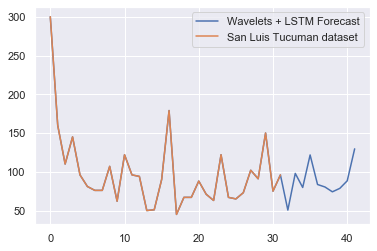

In [701]:
plt.plot(rain_forecats, label='Wavelets + LSTM Forecast')
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values[:-1], label='San Luis Tucuman dataset' )
plt.legend()

## Forecasting emplying several models

In [61]:
y_mean = []
dataset = stations_maxima['San Luis Tucuman'].dropna().values

for j in range(10):
    y_pred = []
    for i in range(10):
        n_features = 1
        n_steps = 10
        X, y = split_sequence(dataset, n_steps)
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=200, verbose=0)
        x_ = np.array(dataset[-10:])


        x_input = x_.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        x_ = np.append(x_[1:],yhat)
        y_pred.append(yhat)
    
    
    (cA, cD) = pywt.dwt(dataset,'db1')
    rain_long_trend = pywt.idwt(None,cD, 'db1', 'smooth')
    rain_seasonal = pywt.idwt(cA, None, 'db1', 'smooth')
    future_forecast_high = []
    future_forecast_low = []
    for i in range(5):
        stepwise_model_seasonal = pm.auto_arima(rain_seasonal, start_p=0, start_q=0,
                               max_p=0, max_q=1, m=7,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
        stepwise_model_long_trend = pm.auto_arima(rain_long_trend, start_p=0, start_q=0,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
        future_forecast_high.append(stepwise_model_seasonal.predict(n_periods=1))

        future_forecast_low.append(stepwise_model.predict(n_periods=1))
    future_forecast = np.mean(future_forecast_low) + np.mean(future_forecast_high)
    print(np.mean((np.mean(y_pred), future_forecast)))
    print(dataset[-1])
    dataset = np.append(dataset,np.mean((np.mean(y_pred), future_forecast)))

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=258.489, BIC=262.263, Fit time=0.059 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=259.743, BIC=262.259, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=261.383, BIC=265.157, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=260.258, BIC=265.291, Fit time=0.085 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=258.418, BIC=259.676, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=259.501, BIC=264.533, Fit time=0.094 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7)

Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=261.685, BIC=265.459, Fit time=0.040 seconds
Total fit time: 0.330 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=373.536, BIC=376.467, Fit time=0.010 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=357.463, BIC=361.860, Fit time=0.033 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=346.747, BIC=351.144, Fit time=0.034 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=371.637, BIC=373.102, Fit time=0.007 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=352.915, BIC=358.778, Fit time=0.041 seconds
Fit ARIMA: order=(3, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=340.807, BIC=348.136, Fit time=0.064 seconds
Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=321.645, BIC=330.

Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=321.788, BIC=330.583, Fit time=0.133 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=332.671, BIC=339.999, Fit time=0.095 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.429 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=258.508, BIC=262.282, Fit time=0.050 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=259.812, BIC=262.328, Fit time=0.007 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=261.430, BIC=265.204, Fit time=0.041 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=260.290, BIC=265.322, Fit time=0.091 seconds
Near non-invertible root

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=277.392, BIC=282.720, Fit time=0.127 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.333 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=394.547, BIC=397.599, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=377.402, BIC=381.981, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=365.838, BIC=370.417, Fit time=0.031 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0

Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=338.690, BIC=347.848, Fit time=0.126 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=350.489, BIC=358.120, Fit time=0.093 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.398 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=275.956, BIC=279.952, Fit time=0.056 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=278.869, BIC=281.534, Fit time=0.006 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=280.078, BIC=284.074, Fit time=0.042 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=277.709, BIC=283.038, Fit time=0.074 seconds
Near non-invertible root

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=280.504, BIC=284.500, Fit time=0.048 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=278.064, BIC=283.393, Fit time=0.103 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=277.962, BIC=279.294, Fit time=0.007 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=277.916, BIC=283.245, Fit time=0.110 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.332 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0

Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=355.725, BIC=365.226, Fit time=0.057 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=368.852, BIC=376.770, Fit time=0.099 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.328 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=293.639, BIC=297.842, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=297.842, BIC=300.645, Fit time=0.011 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=298.505, BIC=302.708, Fit time=0.045 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=295.315, BIC=300.920, Fit time=0.098 seconds
Near non-invertible root

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=298.505, BIC=302.708, Fit time=0.049 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=295.315, BIC=300.920, Fit time=0.122 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=296.760, BIC=298.161, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=295.289, BIC=300.894, Fit time=0.126 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.366 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0

Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=397.775, BIC=402.526, Fit time=0.035 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=385.538, BIC=390.288, Fit time=0.039 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=414.457, BIC=416.040, Fit time=0.006 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=392.343, BIC=398.677, Fit time=0.044 seconds
Fit ARIMA: order=(3, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=377.873, BIC=385.791, Fit time=0.060 seconds
Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=355.736, BIC=365.237, Fit time=0.053 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=310.893, BIC=315.290, Fit time=0.067 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=315.604, BIC=318.536, Fit time=0.009 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=315.945, BIC=320.342, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=312.463, BIC=318.325, Fit time=0.084 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=314.617, BIC=316.082, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=312.580, BIC=318.443, Fit time=0.117 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=312.580, BIC=318.443, Fit time=0.116 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.315 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=437.227, BIC=440.502, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=417.473, BIC=422.386, Fit time=0.032 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=404.452, BIC=409.365, Fit time=0.063 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=435.323, BIC=436.961, Fit time=0.014 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=411.592, BIC=418.142, Fit time=0.048 seconds
Fit ARIMA: order=(3, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=396.312, BIC=404.500, Fit time=0.060 seconds
Fit ARIMA: order=(3, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=372.621, BIC=382.447, Fit time=0.068 seconds
Near non-invertible roots for order (3, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=386.459, BIC=394.647, Fit time=0.100 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.369 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=311.011, BIC=315.408, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=328.108, BIC=332.687, Fit time=0.057 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=334.369, BIC=337.422, Fit time=0.007 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=334.158, BIC=338.737, Fit time=0.048 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=329.660, BIC=335.765, Fit time=0.081 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=333.066, BIC=334.593, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=329.967, BIC=336.073, Fit time=0.123 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=329.967, BIC=336.073, Fit time=0.120 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.319 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=457.987, BIC=461.365, Fit time=0.005 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=437.078, BIC=442.145, Fit time=0.030 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=423.254, BIC=428.321, Fit time=0.040 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0

Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=404.136, BIC=412.581, Fit time=0.112 seconds
Near non-invertible roots for order (2, 2, 1)(0, 0, 0, 1); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 0.350 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=328.127, BIC=332.707, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=334.432, BIC=337.484, Fit time=0.007 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=334.087, BIC=338.666, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=329.644, BIC=335.749, Fit time=0.082 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=333.207, BIC=334.733, Fit time=0.008 seconds
Fit ARIMA: order=(0, 1, 

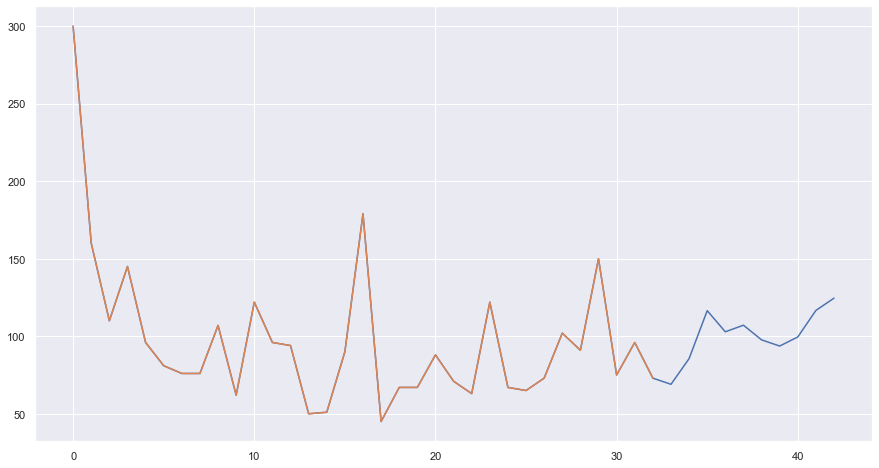

In [66]:
plt.plot(dataset)
plt.plot(stations_maxima['San Luis Tucuman'].dropna().values)


In [144]:
sol_01 = [79.80810546875,
101.09910583496094,
135.21005249023438,
84.65492248535156,
90.16189575195312,
79.65968322753906,
84.2859878540039,
98.77869415283203,
107.19181060791016,
95.2063980102539]
sol_08 = [76.6709213256836,
106.78305053710938,
124.30444717407227,
90.70039749145508,
90.89511108398438,
75.70037841796875,
94.68642044067383,
119.08845901489258,
113.63025665283203,
94.66593933105469]
sol_10 = [96.7000961303711,
123.19404602050781,
124.06180572509766,
101.00494384765625,
86.70817565917969,
78.28337097167969,
112.92948150634766,
144.94393920898438,
110.5270767211914,
106.0992431640625]
sol_11 = [82.25011,
 91.35209,
 145.38004,
 91.9169,
 89.09015,
 80.86726,
 97.32414,
 102.63914,
 106.504135,
 101.5421]

In [185]:
sol_09 = [69.00701363748092,
85.58031932346191,
116.51284609091978,
102.87588894392675,
107.14153227831811,
97.67707868237768,
93.6919488769856,
99.547309786359,
116.65932359789576,
124.59039492369912]
37.3834
sol_03 = [
59.80810546875,
101.09910583496094,
135.21005249023438,
84.65492248535156,
90.16189575195312,
79.65968322753906,
84.2859878540039,
78.77869415283203,
107.19181060791016,
85.2063980102539]
sol_10 = [96.7000961303711,
123.19404602050781,
124.06180572509766,
101.00494384765625,
86.70817565917969,
78.28337097167969,
112.92948150634766,
144.94393920898438,
110.5270767211914,
106.0992431640625]
sol_11 = [71.20473,
 122.47327,
 131.52507,
 109.122574,
 116.12618,
 98.09168,
 89.967545,
 124.11247,
 147.57034,
 109.162865]
sol_12 = [95.27869,
 112.462326,
 130.85025,
 115.53046,
 102.11515,
 83.235214,
 115.05912,
 97.267586,
 146.7239,
 133.96783]

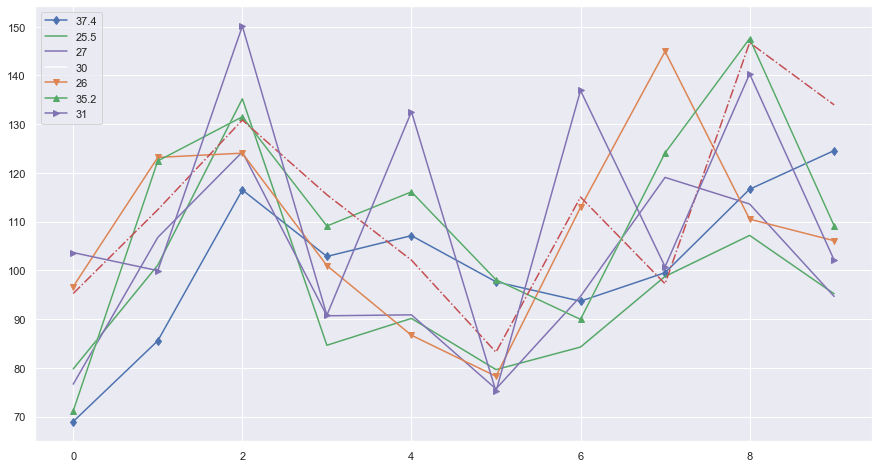

In [216]:
plt.plot(sol_09,'-d', label = '37.4')
plt.plot(sol_01,'-g', label = '25.5')
plt.plot(sol_08,'-m', label = '27')
plt.plot(sol_11,'-w', label = '30')
plt.plot(sol_10, '-v', label = '26')
plt.plot(sol_11, '-^', label = '35.2')
plt.plot(sol_12, '-.')
plt.plot(sol_14, '->', label = '31')

plt.legend()

In [213]:
pd.Series(final_sol).to_csv('solution_14.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [215]:
sol_14 = [103.66378,
 99.9629,
 150.11044,
 90.82194,
 132.56412,
 75.19468,
 136.91783,
 100.771996,
 140.31337,
 102.13192]

In [189]:
sol_12

[71.20473,
 122.47327,
 131.52507,
 109.122574,
 116.12618,
 98.09168,
 89.967545,
 124.11247,
 147.57034,
 109.162865]

In [ ]:
[93.7394,
 129.4533,
 133.9540,
 109.122574,
 116.12618,
 98.09168,
 89.967545,
 124.11247,
 147.57034,
 109.162865]